# Проект: Обучение с учителем: качество модели

# Описание проекта
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.


«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

### Цель проекта:
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

#### Бизнес задача:

1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
1. Нужно собрать данные по клиентам по следующим группам:
  - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
  - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
  - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
  - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
Представим группы признаков (вместе с целевым) в виде диаграммы Исикавы.

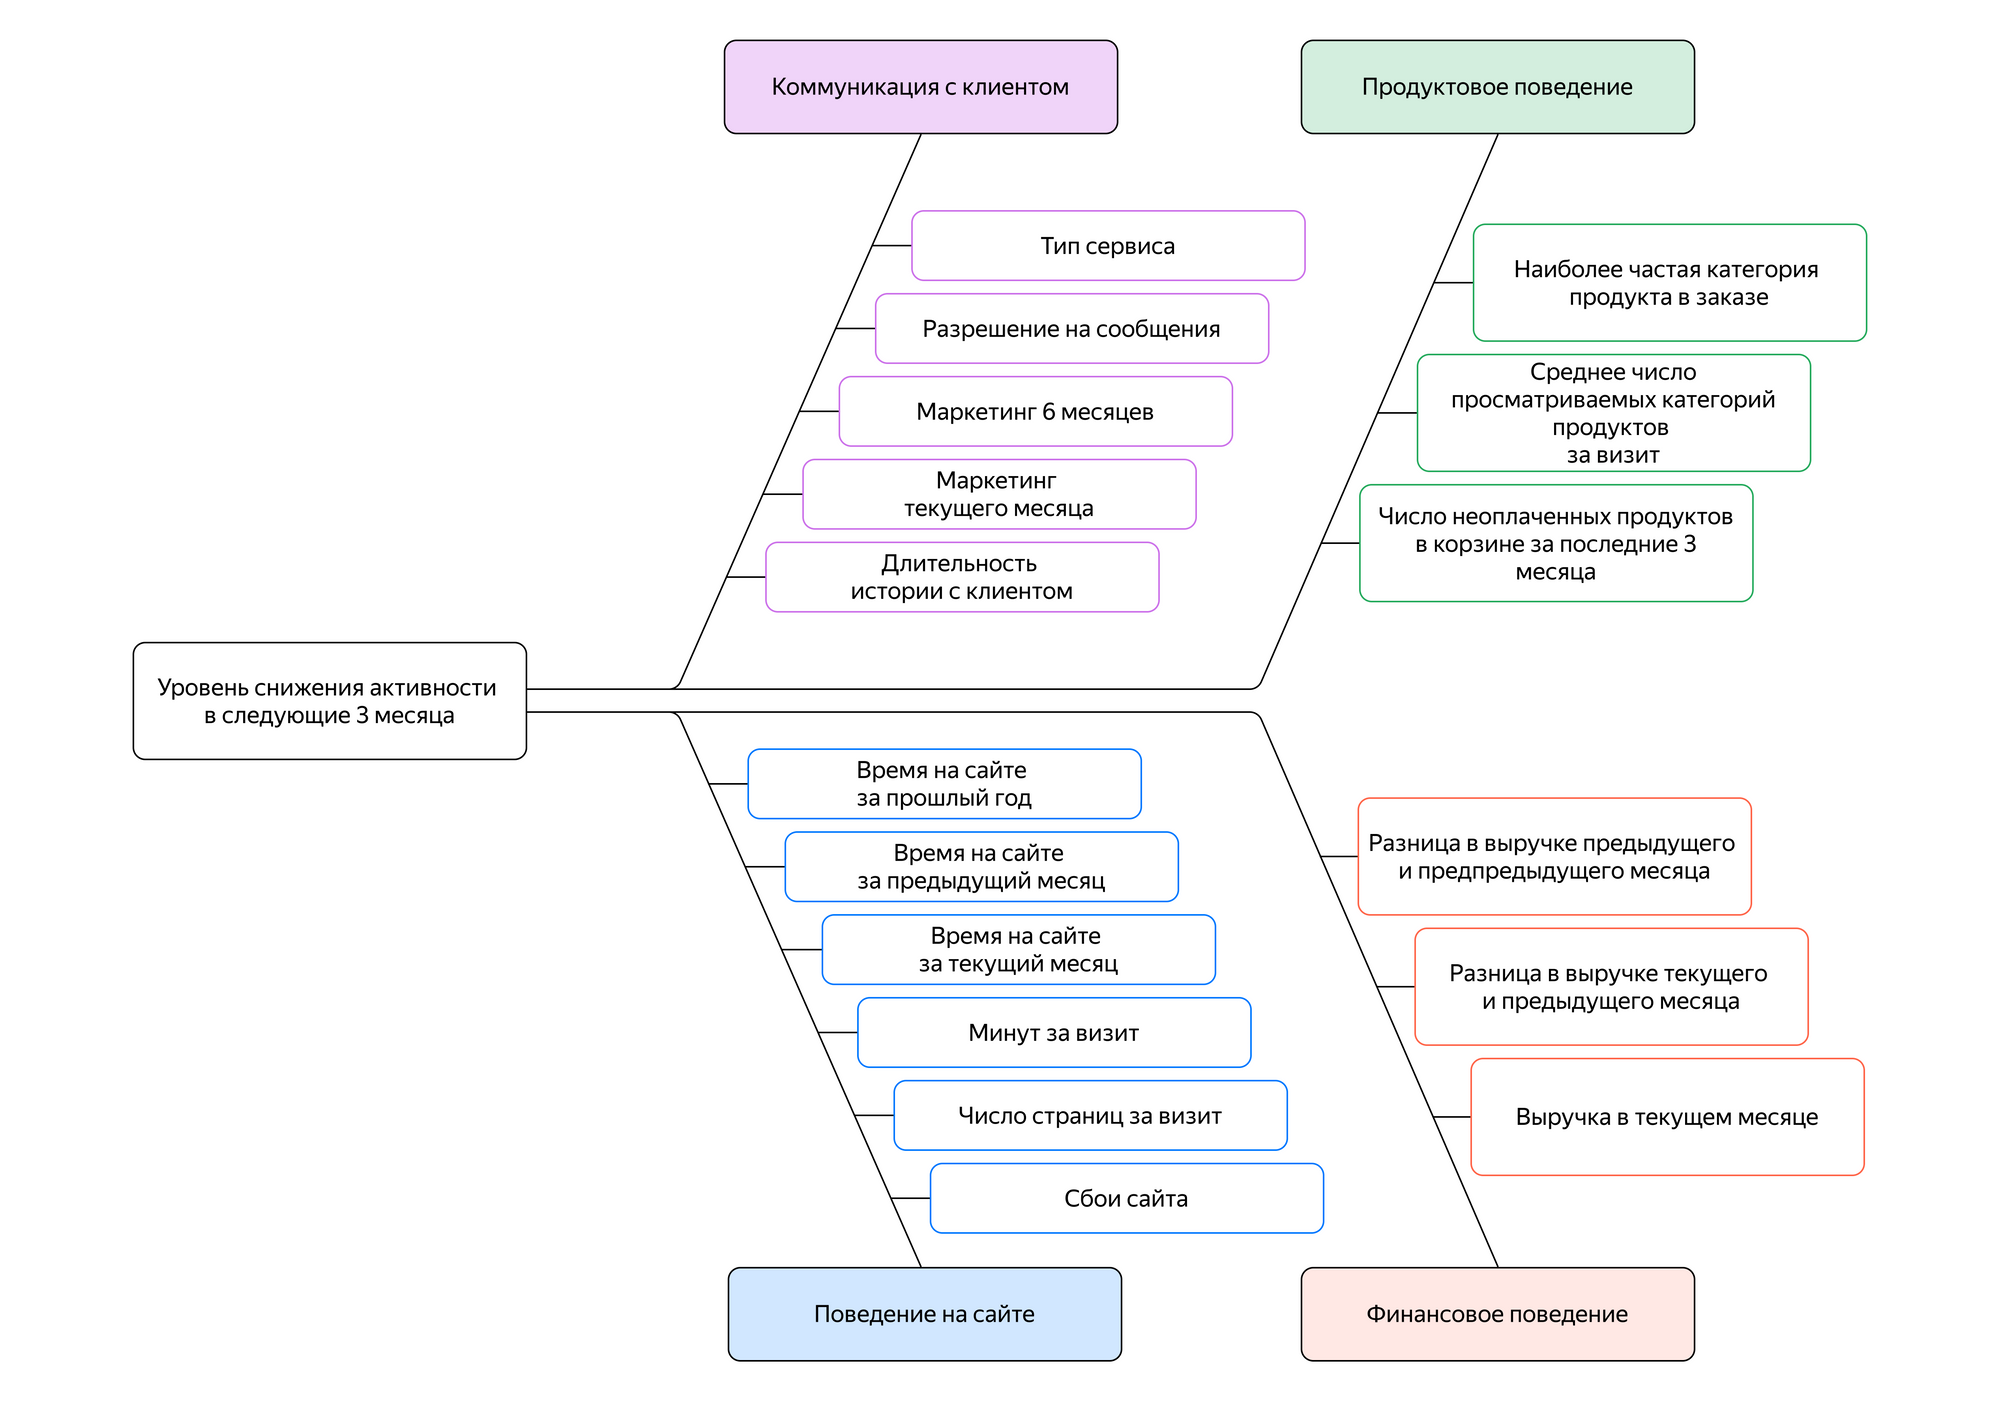

<b>DataScience задача:</b>

1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
1. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
1. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Руководство одобрило описание решения, и вам, как специалисту по DS, нужно его реализовать.

# Описание данных

Данные для работы находятся в нескольких таблицах:

<b>market_file.csv</b>

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.


- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

<b>market_money.csv</b>

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.

<b>money.csv</b>

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

# План проекта

1. Загрузка данных
1. Предобработка данных
1. Исследовательский анализ данных
1. Объединение таблиц
1. Корреляционный анализ
1. Обучение моделей
1. Выбор лучшей модели
1. Анализ важности признаков
1. Общий Вывод

## Загрузка данных

In [122]:
! pip install phik -q
! pip install missingno -q
! pip install shap -q
! pip install -U scikit-learn -q 
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  # Игнорируем только UserWarning

import pandas as pd
import numpy as np
import copy
import shap
import os
import re
import scipy.stats 
from scipy import stats
from scipy.stats import norm, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.dummy import DummyClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import (
    f1_score, 
    roc_auc_score, 
    accuracy_score,
    precision_recall_curve,
    precision_score, 
    recall_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report)

In [3]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

Функция, для создания графиков и отображения количественных данных.

In [4]:
def bild_histplot_boxplot(df):
    sns.set_style('darkgrid')
    for col in df.columns:
        fig, axes = plt.subplots(ncols=2, sharey=False, figsize=(12, 5))
        fig.tight_layout(w_pad=5)
        colors = sns.color_palette('Paired')

        # Проверяем, является ли столбец дискретным (категориальным)
        if df[col].dtype == 'object' or len(df[col].unique()) < 10:
            # Используем countplot для дискретных данных
            sns.countplot(data=df, x=col, ax=axes[0], palette=colors)
            axes[0].set_title(f'Частотный график {col}')
            axes[0].set_xlabel(f'{col}')
            axes[0].set_ylabel('Количество')
        else:
            # Используем histplot для непрерывных данных
            sns.histplot(data=df[col], bins=13, kde=True, ax=axes[0], color='blue')
            axes[0].set_title(f'Гистограмма {col}')
            axes[0].set_xlabel(f'{col}')
            axes[0].set_ylabel('Количество')

        # Создаём боксплот
        sns.boxplot(data=df[col], orient='h', ax=axes[1])
        axes[1].set_title(f'Боксплот {col}')
        axes[1].set_xlabel(f'{col}') 

        plt.show()
        print(df[col].describe())

Функция, для создания графиков и отображения категориальных данных.

In [5]:
def bild_barh_pie(df):
    sns.set_style("ticks")
    for col in df.columns:
        fig, axes = plt.subplots(nrows=2, sharey=False, figsize=(6, 8))
        fig.tight_layout(h_pad = 5)
        colors = sns.color_palette('Set2')
        # this is magic
        explode_value = tuple(
            [0.05 for _ in range(
                len(
                    list(df[col].value_counts()
                        )
                )
            )
            ]
        )
        df[col].value_counts().plot(
            kind='barh', 
            grid=True, 
            ec='black', 
            color=colors, 
            rot=0,
            ax=axes[0]
        )
        df[col].value_counts().plot(
            kind='pie', 
            grid=True, 
            autopct='%1.1f%%',
            colors=colors,
            explode=explode_value,
            shadow=True,
            wedgeprops = {
                'edgecolor' : 'black',
                'linewidth': 2, 
                'antialiased': True
            }, 
            ax=axes[1]
        )
        axes[0].set_title(f'Столбчатая диаграмма данных из колонки: \n{col}' )
        axes[0].set_xlabel('Количество')
        axes[0].set_ylabel('Категории')
        axes[1].set_title(f'Круговая диаграмма данных из колонки: \n{col}')
        axes[1].set_ylabel('')
        axes[1].legend(
            bbox_to_anchor=(1.3,1), 
            loc='upper left', 
            borderaxespad = 0, 
            title=f'{col}')
        display(df.groupby(col, observed=False).size())      
        plt.show()

In [6]:
try:
    df_market_file = pd.read_csv('/datasets/market_file.csv')
    df_market_money = pd.read_csv('/datasets/market_money.csv')
    df_market_time = pd.read_csv('/datasets/market_time.csv')
    df_money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
except:
    df_market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
    df_market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
    df_market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
    df_money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal=',')

In [7]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

### Загрузка market_file.csv

In [8]:
df_market_file.head(5)

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                3.40                     5           121               0.00   
1                4.40                     4           819               0.75   
2                4.90                     3           539               0.14   
3                3.20                     5           896               0.99   
4                5.10                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [9]:
df_market_file.shape 

(1300, 13)

In [10]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [11]:
df_market_file.describe()

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count   1300.00             1300.00               1300.00       1300.00   
mean  215997.50                4.25                  4.01        601.90   
std      375.42                1.01                  0.70        249.86   
min   215348.00                0.90                  3.00        110.00   
25%   215672.75                3.70                  4.00        405.50   
50%   215997.50                4.20                  4.00        606.00   
75%   216322.25                4.90                  4.00        806.00   
max   216647.00                6.60                  5.00       1079.00   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count            1300.00                              1300.00   
mean                0.32                                 3.27   
std                 0.25                                 1.36   
min                 0.00                                 1.00   
25%                 0.17                                 2.00   
50%                 0.24                                 3.00   
75%                 0.30                                 4.00   
max                 0.99                                 6.00   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                             1300.00         1300.00           1300.00  
mean                                 2.84            4.19              8.18  
std                                  1.97            1.96              3.98  
min                                  0.00            0.00              1.00  
25%                                  1.00            3.00              5.00  
50%                                  3.00            4.00              8.00  
75%                                  4.00            6.00             11.00  
max                                 10.00            9.00             20.00

У DataFrame под названием «df_market_file» 1300 строк и 13 столбцов, пропусков в данных нет. Нужно преобразовать категориальные данные в соответствующий тип. Можно уменьшить объём памяти, преобразовав числовые значения в формат .32. Строки с медианой и средним значением почти совпадают. Необходимо исправить очевидную опечатку.

### Загрузка market_money.csv

In [12]:
df_market_money.head(5)

id               Период  Выручка
0  215348  препредыдущий_месяц     0.00
1  215348        текущий_месяц  3293.10
2  215348     предыдущий_месяц     0.00
3  215349  препредыдущий_месяц  4472.00
4  215349        текущий_месяц  4971.60

In [13]:
df_market_money.shape

(3900, 3)

In [14]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [15]:
df_market_money.describe()

id   Выручка
count   3900.00   3900.00
mean  215997.50   5025.70
std      375.33   1777.70
min   215348.00      0.00
25%   215672.75   4590.15
50%   215997.50   4957.50
75%   216322.25   5363.00
max   216647.00 106862.20

In [16]:
df_market_money.isna().sum()

id         0
Период     0
Выручка    0
dtype: int64

«df_market_money» 
- содержит 3900 строк и 3 столбца. 
- Пропущенных значений в данных нет. 
- Необходимо преобразовать категориальные данные в соответствующий тип. 
- Можно уменьшить объём памяти, преобразовав числовые значения в формат .32.
- Для модели лучше закодировать столбец «Период» в адекватные значения. 
- Есть интересное наблюдение: значение 0 в выручке и огромное максимальное значение относительно среднего, что может указывать на выброс. Это необходимо проверить.

### Загрузка market_time.csv

In [17]:
df_market_time.head(5)

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [18]:
df_market_time.shape

(2600, 3)

In [19]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [20]:
df_market_time.describe()

id   минут
count   2600.00 2600.00
mean  215997.50   13.34
std      375.35    4.08
min   215348.00    4.00
25%   215672.75   10.00
50%   215997.50   13.00
75%   216322.25   16.00
max   216647.00   23.00

In [21]:
df_market_time.isna().sum()

id        0
Период    0
минут     0
dtype: int64

«df_market_time» 
- Cодержит 2600 строк и 2 столбца.
- Пропущенных значений в данных нет. 
- Нужно преобразовать категориальные данные в соответствующий тип. 
- Можно уменьшить объём памяти, преобразовав числовые значения в формат .32.
- Для модели лучше закодировать столбец «Период» в адекватные значения. 
- Следует исправить очевидную опечатку в названии столбца или другом упомянутом слове.

### Загрузка money.csv

In [22]:
df_money.head(5)

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

In [23]:
df_money.shape

(1300, 2)

In [24]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [25]:
df_money.describe()

id  Прибыль
count   1300.00  1300.00
mean  215997.50     4.00
std      375.42     1.01
min   215348.00     0.86
25%   215672.75     3.30
50%   215997.50     4.04
75%   216322.25     4.67
max   216647.00     7.43

In [26]:
df_money.isna().sum()

id         0
Прибыль    0
dtype: int64

- Состоит из 1300 строк и 2 столбцов.
- Пропущенных значений не наблюдается.
- Можно уменьшить занимаемую память, переведя числовые значения в .32.
- В строках медиана и среднее почти одинаковы.

## Предобработка данных

### Проверим данные на наличие дубликатов

In [27]:
df_market_file.duplicated().sum()


0

In [28]:
df_market_money.duplicated().sum()

0

In [29]:
df_market_time.duplicated().sum()

0

In [30]:
df_money.duplicated().sum()

0

Явные дубликаты отсутствуют, приведем колонки к змеиному регистру

### исправим опечатки и приведем типы

In [31]:
dfs = [
	df_market_file,
	df_market_money,
	df_market_time,
    df_money
]

for df in dfs:
	df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).replace(' ', '_').lower() for i in df.columns]

In [32]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

выведем значения внутри таблицы с маленькой буквы

In [33]:
pd.DataFrame(df_market_file.apply(np.unique))

0
id                                   [215348, 215349, 215350, 215351, 215352, 215353, 215354, 215355, 215356, 215357, 215358, 215359, 215360, 215361, 215362, 215363, 215364, 215365, 215366, 215367, 215368, 215369, 215370, 215371, 215372, 215373, 215374, 215375, 215376, 215377, 215378, 215379, 215380, 215381, 215382, 215383, 215384, 215385, 215386, 215387, 215388, 215389, 215390, 215391, 215392, 215393, 215394, 215395, 215396, 215397, 215398, 215399, 215400, 215401, 215402, 215403, 215404, 215405, 215406, 215407, 215408, 215409, 215410, 215411, 215412, 215413, 215414, 215415, 215416, 215417, 215418, 215419, 215420, 215421, 215422, 215423, 215424, 215425, 215426, 215427, 215428, 215429, 215430, 215431, 215432, 215433, 215434, 215435, 215436, 215437, 215438, 215439, 215440, 215441, 215442, 215443, 215444, 215445, 215446, 215447, ...]
покупательская_активность                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     [Прежний уровень, Снизилась]
тип_сервиса                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 [премиум, стандарт, стандартт]
разрешить_сообщать                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [да, нет]
маркет_актив_6_мес                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

Исправим опечатки

In [34]:
df_market_file['тип_сервиса'] = df_market_file['тип_сервиса'].str.lower().replace('стандартт', 'стандарт')
df_market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [35]:
df_market_file['популярная_категория'] = (
    df_market_file['популярная_категория']
    .str.lower()
    .replace('косметика и аксесуары', 'косметика и аксессуары')
)
df_market_file['популярная_категория'].unique()

array(['товары для детей', 'домашний текстиль', 'косметика и аксессуары',
       'техника для красоты и здоровья', 'кухонная посуда',
       'мелкая бытовая техника и электроника'], dtype=object)

In [36]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [37]:
df_market_file[
    df_market_file.select_dtypes(["int64"]).columns
] = df_market_file.select_dtypes(["int64"]).apply(lambda x: x.astype("int32"))
df_market_file[
    df_market_file.select_dtypes(["float64"]).columns
] = df_market_file.select_dtypes(["float64"]).apply(lambda x: x.astype("float32"))
df_market_file[
    df_market_file.select_dtypes(["object"]).columns
] = df_market_file.select_dtypes(["object"]).apply(lambda x: x.astype("category"))

In [38]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1300 non-null   int32   
 1   покупательская_активность            1300 non-null   category
 2   тип_сервиса                          1300 non-null   category
 3   разрешить_сообщать                   1300 non-null   category
 4   маркет_актив_6_мес                   1300 non-null   float32 
 5   маркет_актив_тек_мес                 1300 non-null   int32   
 6   длительность                         1300 non-null   int32   
 7   акционные_покупки                    1300 non-null   float32 
 8   популярная_категория                 1300 non-null   category
 9   средний_просмотр_категорий_за_визит  1300 non-null   int32   
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int32   
 11  ошибка_сервиса   

In [39]:
df_market_money.nunique()

id         1300
период        3
выручка    2776
dtype: int64

In [40]:
len(df_market_money['период'].unique())

3

In [41]:
len(df_market_money[df_market_money['период'] =='препредыдущий_месяц'])

1300

In [42]:
df_market_money['период'] = (
    df_market_money['период']
    .str.lower()
    .replace('препредыдущий_месяц', 'пред_предыдущий_месяц')
)
df_market_money['период'].unique()

array(['пред_предыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [43]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [44]:
df_market_money[
    df_market_money.select_dtypes(['int64']).columns
] = df_market_money.select_dtypes(['int64']).apply(lambda x: x.astype("int32"))
df_market_money[
    df_market_money.select_dtypes(['float64']).columns
] = df_market_money.select_dtypes(['float64']).apply(lambda x: x.astype("float32"))
df_market_money[
    df_market_money.select_dtypes(['object']).columns
] = df_market_money.select_dtypes(['object']).apply(lambda x: x.astype("category"))
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       3900 non-null   int32   
 1   период   3900 non-null   category
 2   выручка  3900 non-null   float32 
dtypes: category(1), float32(1), int32(1)
memory usage: 34.5 KB


In [45]:
pd.DataFrame(df_market_time.apply(np.unique))

0
id      [215348, 215349, 215350, 215351, 215352, 215353, 215354, 215355, 215356, 215357, 215358, 215359, 215360, 215361, 215362, 215363, 215364, 215365, 215366, 215367, 215368, 215369, 215370, 215371, 215372, 215373, 215374, 215375, 215376, 215377, 215378, 215379, 215380, 215381, 215382, 215383, 215384, 215385, 215386, 215387, 215388, 215389, 215390, 215391, 215392, 215393, 215394, 215395, 215396, 215397, 215398, 215399, 215400, 215401, 215402, 215403, 215404, 215405, 215406, 215407, 215408, 215409, 215410, 215411, 215412, 215413, 215414, 215415, 215416, 215417, 215418, 215419, 215420, 215421, 215422, 215423, 215424, 215425, 215426, 215427, 215428, 215429, 215430, 215431, 215432, 215433, 215434, 215435, 215436, 215437, 215438, 215439, 215440, 215441, 215442, 215443, 215444, 215445, 215446, 215447, ...]
период                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [предыдцщий_месяц, текущий_месяц]
минут                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [46]:
df_market_time['период'] = df_market_time['период'].str.lower().replace('предыдцщий_месяц', 'предыдущий_месяц')
df_market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

In [47]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [48]:
df_market_time[
    df_market_time.select_dtypes(["int64"]).columns
] = df_market_time.select_dtypes(["int64"]).apply(lambda x: x.astype("int32"))
df_market_time[
    df_market_time.select_dtypes(["object"]).columns
] = df_market_time.select_dtypes(["object"]).apply(lambda x: x.astype("category"))
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      2600 non-null   int32   
 1   период  2600 non-null   category
 2   минут   2600 non-null   int32   
dtypes: category(1), int32(2)
memory usage: 23.1 KB


In [49]:
pd.DataFrame(df_money.apply(np.unique))

0
id       [215348, 215349, 215350, 215351, 215352, 215353, 215354, 215355, 215356, 215357, 215358, 215359, 215360, 215361, 215362, 215363, 215364, 215365, 215366, 215367, 215368, 215369, 215370, 215371, 215372, 215373, 215374, 215375, 215376, 215377, 215378, 215379, 215380, 215381, 215382, 215383, 215384, 215385, 215386, 215387, 215388, 215389, 215390, 215391, 215392, 215393, 215394, 215395, 215396, 215397, 215398, 215399, 215400, 215401, 215402, 215403, 215404, 215405, 215406, 215407, 215408, 215409, 215410, 215411, 215412, 215413, 215414, 215415, 215416, 215417, 215418, 215419, 215420, 215421, 215422, 215423, 215424, 215425, 215426, 215427, 215428, 215429, 215430, 215431, 215432, 215433, 215434, 215435, 215436, 215437, 215438, 215439, 215440, 215441, 215442, 215443, 215444, 215445, 215446, 215447, ...]
прибыль                                                                                                                                                                                                                  [0.86, 0.98, 1.06, 1.08, 1.33, 1.37, 1.38, 1.39, 1.4, 1.48, 1.54, 1.55, 1.57, 1.63, 1.64, 1.68, 1.81, 1.82, 1.83, 1.84, 1.87, 1.92, 1.95, 1.97, 2.0, 2.02, 2.03, 2.07, 2.08, 2.09, 2.1, 2.11, 2.13, 2.15, 2.16, 2.18, 2.19, 2.21, 2.23, 2.24, 2.26, 2.27, 2.29, 2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.41, 2.42, 2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.53, 2.54, 2.55, 2.57, 2.59, 2.6, 2.61, 2.63, 2.64, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, ...]

In [50]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [51]:
df_money[
    df_money.select_dtypes(['int64']).columns
] = df_money.select_dtypes(['int64']).apply(lambda x: x.astype("int32"))
df_money[
    df_money.select_dtypes(['float64']).columns
] = df_money.select_dtypes(['float64']).apply(lambda x: x.astype("float32"))
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int32  
 1   прибыль  1300 non-null   float32
dtypes: float32(1), int32(1)
memory usage: 10.3 KB


<b>Вывод:</b>

- Проверили данные на дубликаты и обнаружили скрытые дубликаты. Исправили их.
- Привели типы данных: числовые столбцы преобразовали в float32 для возможности осуществления математических операций, а просто числовые столбцы — в int32 для экономии памяти. Остальные данные преобразовали в категориальный тип, что позволило сэкономить память.

## Исследовательский анализ данных

#### Исследование количественных значений

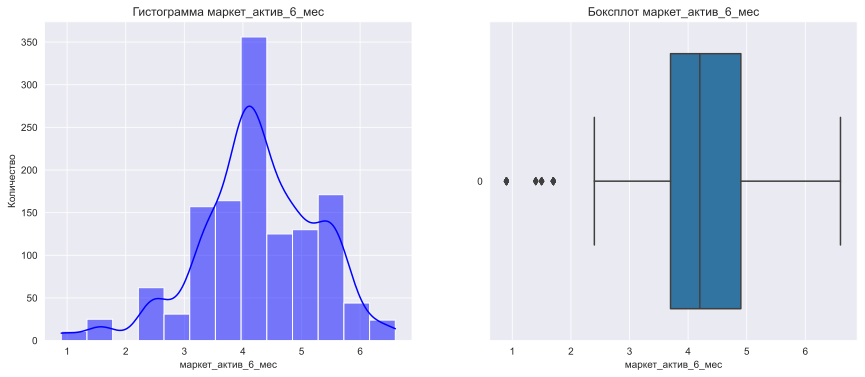

count   1300.00
mean       4.25
std        1.01
min        0.90
25%        3.70
50%        4.20
75%        4.90
max        6.60
Name: маркет_актив_6_мес, dtype: float64


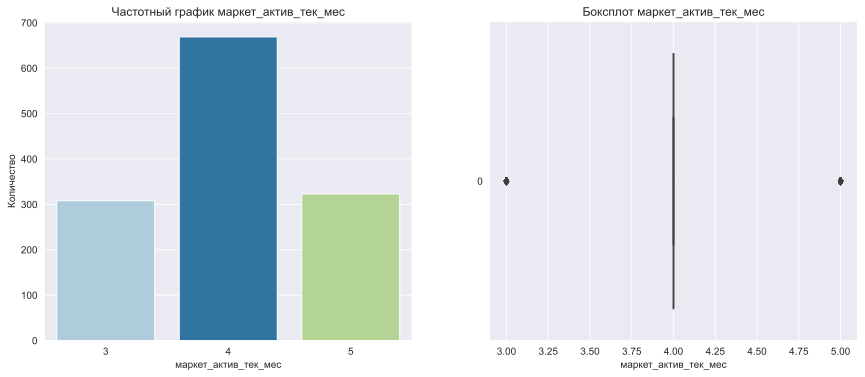

count   1300.00
mean       4.01
std        0.70
min        3.00
25%        4.00
50%        4.00
75%        4.00
max        5.00
Name: маркет_актив_тек_мес, dtype: float64


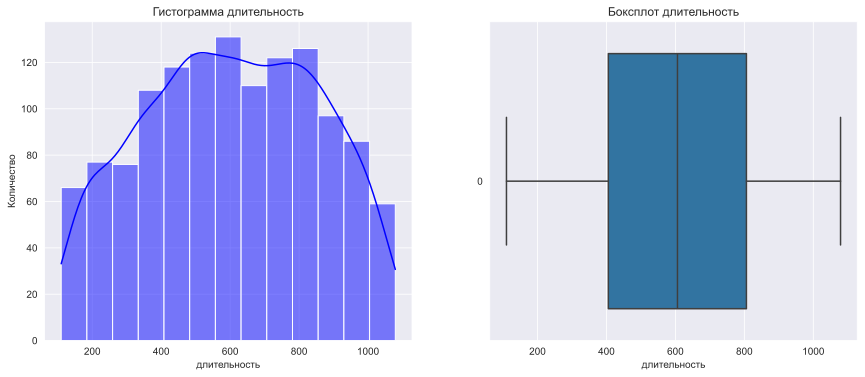

count   1300.00
mean     601.90
std      249.86
min      110.00
25%      405.50
50%      606.00
75%      806.00
max     1079.00
Name: длительность, dtype: float64


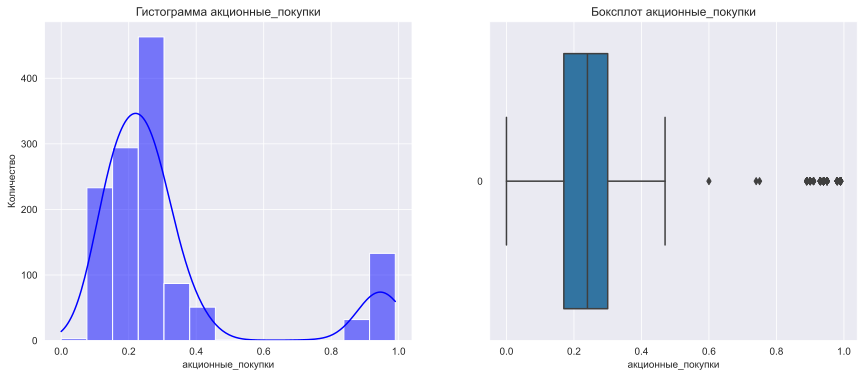

count   1300.00
mean       0.32
std        0.25
min        0.00
25%        0.17
50%        0.24
75%        0.30
max        0.99
Name: акционные_покупки, dtype: float64


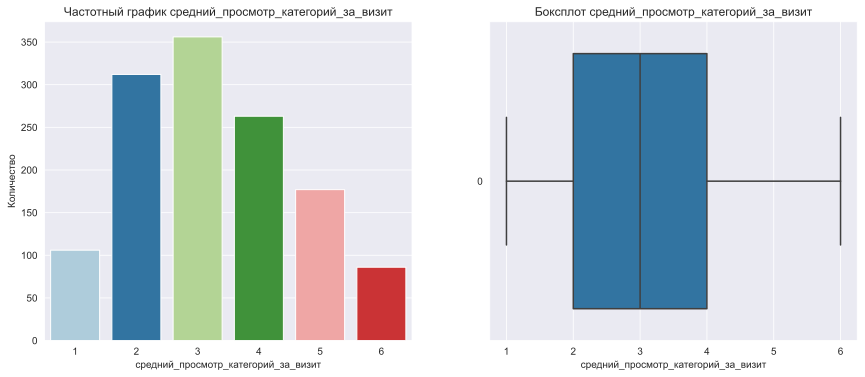

count   1300.00
mean       3.27
std        1.36
min        1.00
25%        2.00
50%        3.00
75%        4.00
max        6.00
Name: средний_просмотр_категорий_за_визит, dtype: float64


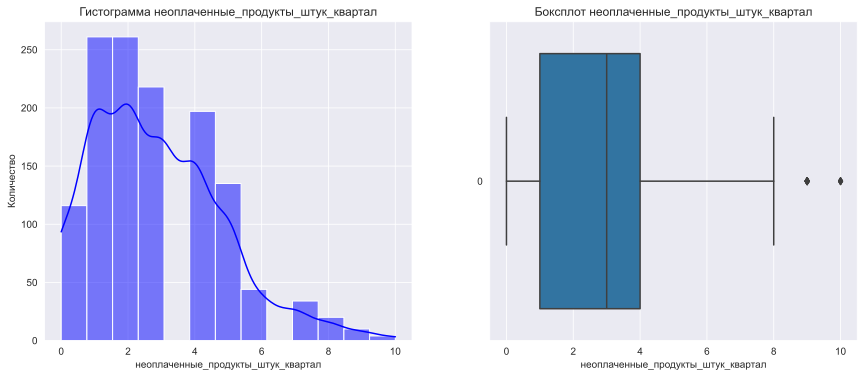

count   1300.00
mean       2.84
std        1.97
min        0.00
25%        1.00
50%        3.00
75%        4.00
max       10.00
Name: неоплаченные_продукты_штук_квартал, dtype: float64


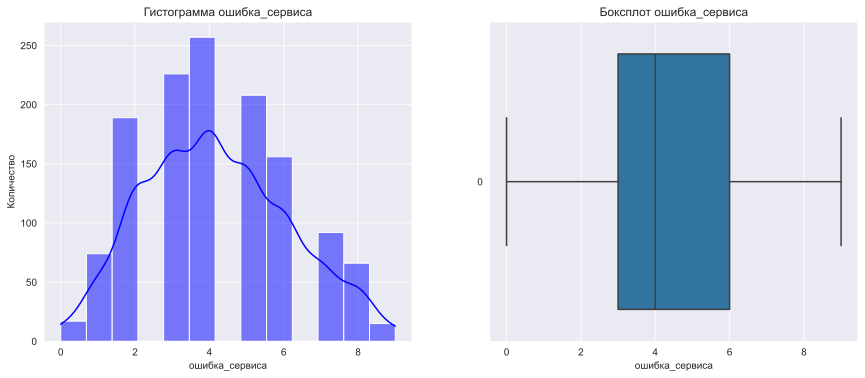

count   1300.00
mean       4.19
std        1.96
min        0.00
25%        3.00
50%        4.00
75%        6.00
max        9.00
Name: ошибка_сервиса, dtype: float64


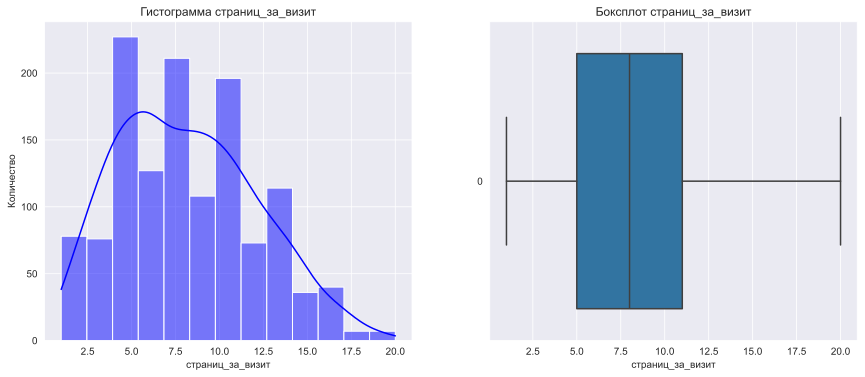

count   1300.00
mean       8.18
std        3.98
min        1.00
25%        5.00
50%        8.00
75%       11.00
max       20.00
Name: страниц_за_визит, dtype: float64


In [52]:
bild_histplot_boxplot(df_market_file.select_dtypes(include='number').drop('id', axis =1))

<b>Выводы по распределениям числовых признаков df_market_file.</b>

-  маркет_актив_6 мес - Распределение похоже на нормальное, имет незначительные пики слева.
Среднее - 4.25, медиана - 4,20. Минимальное значение 0.9, максимальное 6.60
- маркет_актив_тек_мес - Распределение - мультимодальное. Имеются пики: 3, 4, 5. Среднее - 4.01, медиана - 4.00. Минимальное значение 3.0, максимальное 5.00
- длительность- Распределение похоже на нормальное.
Среднее - 601.89, медиана - 606. Минимальное значение 110, максимальное 1079
- акционные_покупки Бимодальное (двугорбое) распределение. Некоторые покупатели делают покупки только по акциям. Среднее - 32, медиана - 24. Минимальное значение 0, максимальное 0.99
- средний_просмотр_категорий_за_визит Распределение похоже на нормальное Среднее - 3.27, медиана - 3. Минимальное значение 1, максимальное 6
- неоплаченные_продукты_штук_квартал Распределение похоже на нормальное, имеет хвост справа. Среднее - 2.84, медиана - 3. Минимальное значение 0, максимальное 10
- ошибка_сервиса - Нормальное распределение Среднее - 4.19, медиана - 4. Минимальное значение 0, максимальное 9
- страниц_за_визит Распределение похоже на нормальное
Среднее - 8.17, медиана - 8. Минимальное значение 1, максимальное 20

#### Исследование категориальных значений

С функции создадим столбчатые диаграммы и круговые для анализа категориальных признаков

покупательская_активность
Прежний уровень    802
Снизилась          498
dtype: int64

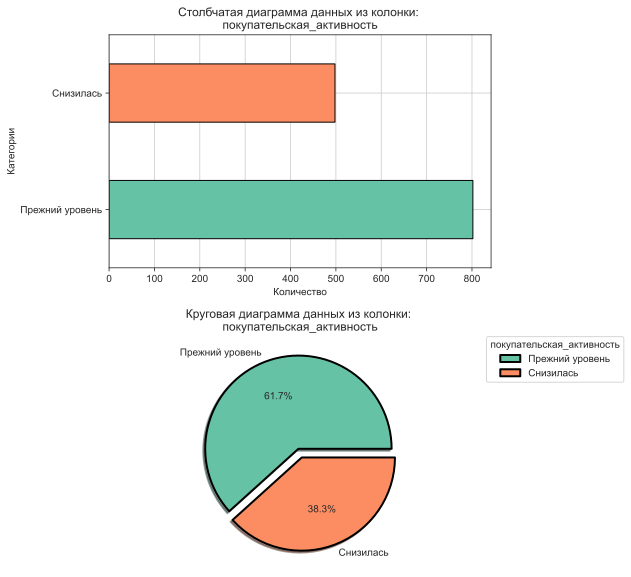

тип_сервиса
премиум     376
стандарт    924
dtype: int64

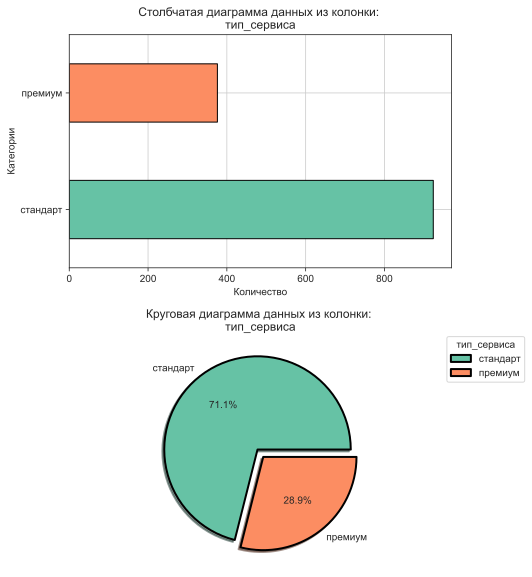

разрешить_сообщать
да     962
нет    338
dtype: int64

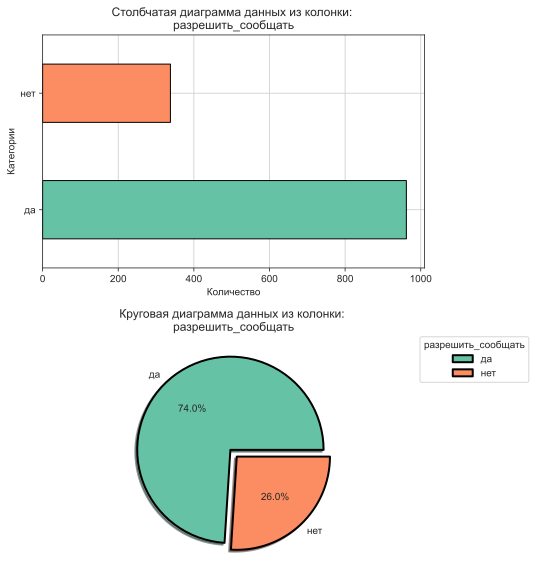

популярная_категория
домашний текстиль                       251
косметика и аксессуары                  223
кухонная посуда                         138
мелкая бытовая техника и электроника    174
техника для красоты и здоровья          184
товары для детей                        330
dtype: int64

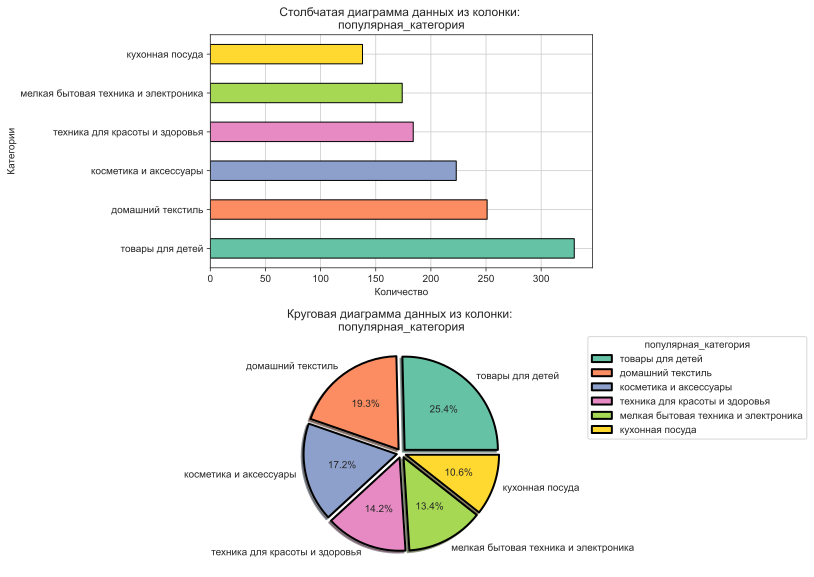

In [53]:
bild_barh_pie(df_market_file.select_dtypes(include='category'))

`покупательская_активность` - несмотря на то, что достаточно большой уровень пользователей сохраняют свою покупательскую активность, снижению подверглись уже - 38,3% пользователей.  
`тип_сервиса` - в основном у пользователей стандартный уроверь сервиса - 71,1%  
`разрешить_сообщать`,  2/3 пользователей разрешили сообщать о дополнительных предложениях на товар  
`популярная_категория` - наиболее популярная категория - товары для детей - 25,4, самая низкая - кухонная посуда 10,6
          

### Исследовательский анализ df_market_money

Проведем аналогичные действия с данной таблицей

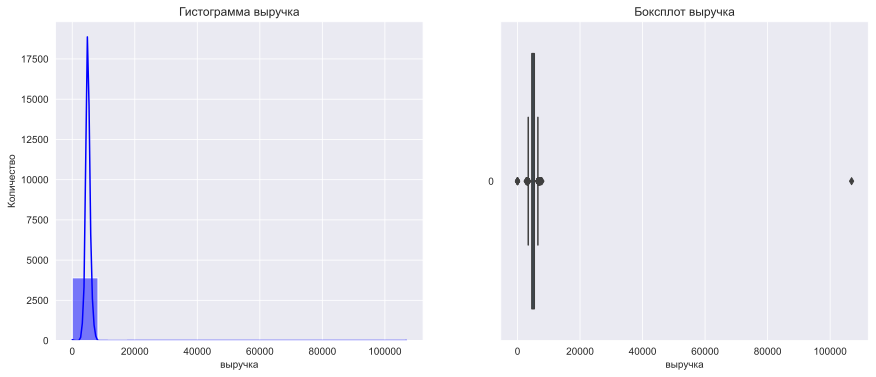

count     3900.00
mean      5025.70
std       1777.70
min          0.00
25%       4590.15
50%       4957.50
75%       5363.00
max     106862.20
Name: выручка, dtype: float64


In [54]:
bild_histplot_boxplot(df_market_money.select_dtypes(include='number').drop('id', axis =1))

График очень не информативен из-за большого максимального значения 106 862 и минимального 0

In [55]:
df_market_money.query('выручка > 20000 or выручка < 10')

id                 период   выручка
0   215348  пред_предыдущий_месяц      0.00
2   215348       предыдущий_месяц      0.00
28  215357  пред_предыдущий_месяц      0.00
29  215357       предыдущий_месяц      0.00
34  215359       предыдущий_месяц      0.00
35  215359  пред_предыдущий_месяц      0.00
98  215380          текущий_месяц 106862.20

Используем правило трех сигм: почти все значения принимаются лежащими в пределах трех стандартных отклонений от среднего, и поэтому эмпирически полезно рассматривать 99,7% вероятность как почти достоверную. Посмотрим попадает ли наше отклонение в эти пределы

In [56]:
df_market_money[
    df_market_money.выручка > df_market_money.выручка.quantile(q=0.999)
].sort_values(by='выручка' ,ascending=False)

id         период   выручка
98    215380  текущий_месяц 106862.20
435   215493  текущий_месяц   7799.40
262   215435  текущий_месяц   7605.30
1481  215841  текущий_месяц   7557.00

Посмотрим на пользователя с анамально большим значением

In [57]:
df_market_money[df_market_money.id ==215380]

id                 период   выручка
96  215380  пред_предыдущий_месяц   5051.00
97  215380       предыдущий_месяц   6077.00
98  215380          текущий_месяц 106862.20

Видим, что этот пользователь совершал покупки во все исследуемые месяцы, но из за недостоверных значений последнего (выхода за пределы 3 сигм), а так же анализа того, что при удалении данных значений не произойдет падения достоверности выборки

Принимаем решение о возможности удаления данных пользователя из выборки. Сделаем это после объединения таблиц.

Теперь посмотрим на пользователей с нулевой активностью

In [58]:
df_market_money.query('id == 215348 or id == 215357 or id == 215359')

id                 период  выручка
0   215348  пред_предыдущий_месяц     0.00
1   215348          текущий_месяц  3293.10
2   215348       предыдущий_месяц     0.00
27  215357          текущий_месяц  5986.30
28  215357  пред_предыдущий_месяц     0.00
29  215357       предыдущий_месяц     0.00
33  215359          текущий_месяц  4735.00
34  215359       предыдущий_месяц     0.00
35  215359  пред_предыдущий_месяц     0.00

У всех этих пользователей активность появилась в текущем месяце, либо они зарегистрировались и не делали покупок, либо просто не постоянно активны, и покупают допустим только по акциям, удалять не будем, так как они и так не войдут в выборку по ежемесячно активным пользователям

Построим график без выброса по аномально большому значению

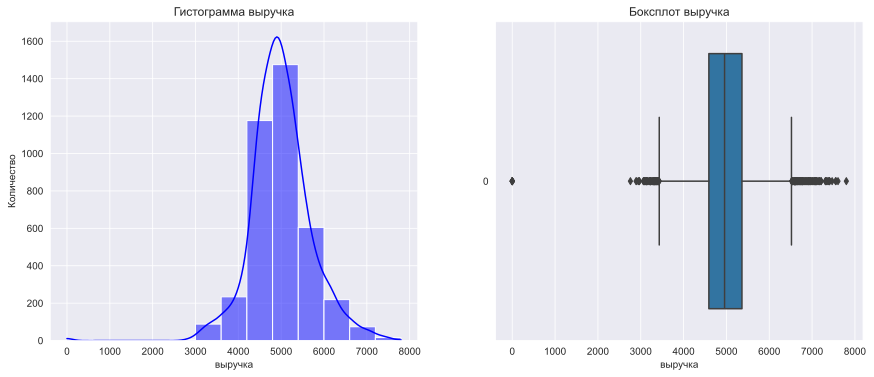

count   3899.00
mean    4999.58
std      707.00
min        0.00
25%     4590.10
50%     4957.00
75%     5363.00
max     7799.40
Name: выручка, dtype: float64


In [59]:
bild_histplot_boxplot(
    df_market_money.query('выручка < 106862.2').select_dtypes(include='number').drop('id', axis =1)
                     )

Если не учитываеть аномально большое значение видим нормальное распределение.

#### Исследование категориальных значений

период
пред_предыдущий_месяц    1300
предыдущий_месяц         1300
текущий_месяц            1300
dtype: int64

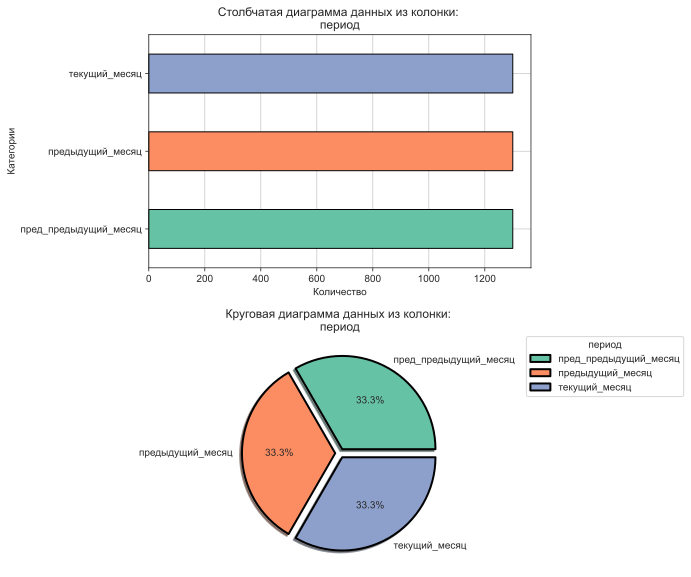

In [60]:
bild_barh_pie(df_market_money.select_dtypes(include='category'))

Видим одинаковое значение, что логично, так как период у нас трехмесячный, следовательно на каждый период равный 1 месяцу приходится 33,3% значений

### Исследовательский анализ df_market_time

#### Исследование количественных значений

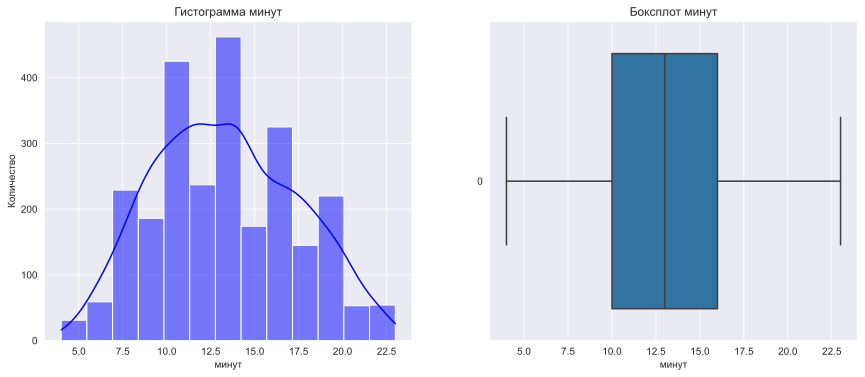

count   2600.00
mean      13.34
std        4.08
min        4.00
25%       10.00
50%       13.00
75%       16.00
max       23.00
Name: минут, dtype: float64


In [61]:
bild_histplot_boxplot(df_market_time.select_dtypes(include='number').drop('id', axis =1))

Распределение имеет нескольких мод (пиков) и данные имеют небольшие отклонения от симметрии. В данных отсутствуют аномальные значения и выбросы. Покупатели проводят от 4 до 23 минут на сайте, со средним значением около 13 минут.

#### Исследование категориальных значений

период
предыдущий_месяц    1300
текущий_месяц       1300
dtype: int64

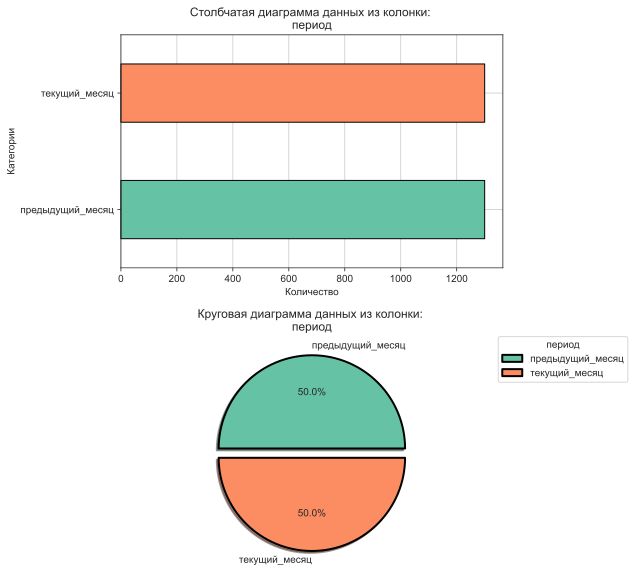

In [62]:
bild_barh_pie(df_market_time.select_dtypes(include='category'))

### Исследовательский анализ df_money

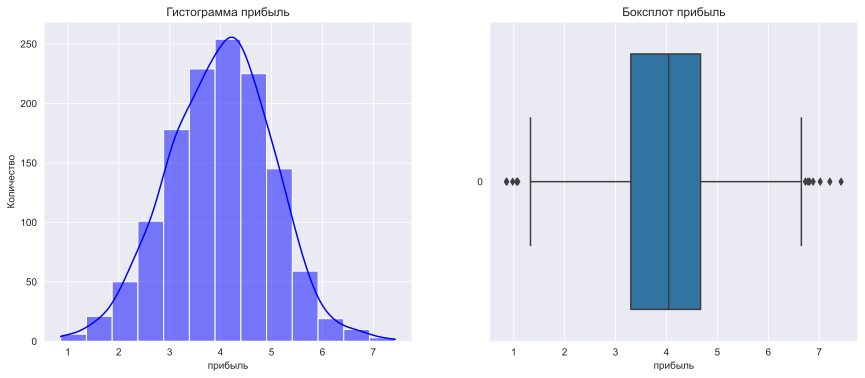

count   1300.00
mean       4.00
std        1.01
min        0.86
25%        3.30
50%        4.05
75%        4.67
max        7.43
Name: прибыль, dtype: float64


In [63]:
bild_histplot_boxplot(df_money.select_dtypes(include='number').drop('id', axis =1))

Средняя среднемесячная прибыли покупателя за последние 3 месяца равна 4.

### отберите клиентов с покупательской активностью не менее трёх месяцев, 
(то есть таких, которые что-либо покупали в этот период. )

Для этого нам нужна таблица df_market_money, так как только она содержит данные о выручке, что нам и говорит о покупках

Найдем пользователей которые не совершали покупок в каком либо из месяцев

In [64]:
users_three_months_not_buyer = df_market_money.loc[(df_market_money['выручка'] == 0)]['id'].unique()
users_three_months_not_buyer

array([215348, 215357, 215359])

Это как раз те три пользователя, что делали нам выбросы при исследовании графиков.

Создадим переменную в которую запишем пользователей за исключением тех кто не делает покупки.

In [65]:
users_three_months_buyer = df_market_money[df_market_money.id.isin(users_three_months_not_buyer) == False]
users_three_months_buyer.head(5)

id                 период  выручка
3  215349  пред_предыдущий_месяц  4472.00
4  215349          текущий_месяц  4971.60
5  215349       предыдущий_месяц  5216.00
6  215350  пред_предыдущий_месяц  4826.00
7  215350          текущий_месяц  5058.40

In [66]:
users_three_months_buyer['id'].nunique()

1297

Итого у нас 1297 пользователей с постоянной ежемесячной активностью.

Вывод по разделу:
Выводы по распределениям числовых признаков df_market_file.

**Выводы по распределениям числовых признаков df_market_file.**  
- `маркет_актив_6 мес`	- Распределение похоже на нормальное, имет незначительные пики слева.   
Среднее - 4.25, медиана - 4,20. Минимальное значение 0.9, максимальное 6.60 
- `маркет_актив_тек_мес`	- Распределение - мультимодальное. Имеются пики: 3, 4, 5.	
Среднее - 4.01, медиана - 4.00. Минимальное значение 3.0, максимальное 5.00
- `длительность`-	Распределение похоже на нормальное.  
Среднее - 601.89, медиана - 606. Минимальное значение 110, максимальное 1079
- `акционные_покупки`	Бимодальное (двугорбое) распределение. Некоторые покупатели делают покупки только по акциям.
Среднее - 32, медиана - 24. Минимальное значение 0, максимальное 0.99
- `средний_просмотр_категорий_за_визит`	Распределение похоже на нормальное	
Среднее - 3.27, медиана - 3. Минимальное значение 1, максимальное 6
- `неоплаченные_продукты_штук_квартал`	Распределение похоже на нормальное, имеет хвост справа.	
Среднее - 2.84, медиана - 3. Минимальное значение 0, максимальное 10
- `ошибка_сервиса` - Нормальное распределение	
Среднее - 4.19, медиана - 4. Минимальное значение 0, максимальное 9
- `страниц_за_визит`	Распределение похоже на нормальное  
Среднее - 8.17, медиана - 8. Минимальное значение 1, максимальное 20

**Выводы по распределениям категориальных признаков df_market_file**.
- `покупательская_активность` - несмотря на то, что достаточно большой уровень пользователей сохраняют свою покупательскую активность, снижению подверглись уже - 38,3% пользователей.  
- `тип_сервиса` - в основном у пользователей стандартный уроверь сервиса - 71,1%  
- `разрешить_сообщать`,  2/3 пользователей разрешили сообщать о дополнительных предложениях на товар  
- `популярная_категория` - наиболее популярная категория - товары для детей - 25,4, самая низкая - кухонная посуда 10,6

**Выводы по распределениям числовых признаков df_market_money.**  
- Обнаружили пользователя с аномальным большим значением покупок за последний месяц (не смотря на то что пользователь совершал покупки во все исследуемые месяцы, но из за недостоверных значений последнего (выхода за пределы 3 сигм), а так же анализа того, что при удалении данных значений не произойдет падения достоверности выборки принимает решение об удалении его в дальнейшем)
- Обнаружили пользователей у которых активность появилась в текущем месяце, либо они зарегистрировались и не делали покупок, либо просто не постоянно активны, и покупают допустим только по акциям, удалять не будем, так как они и так не войдут в выборку по ежемесячно активным пользователям (так же принимаем решеине об удалении в дальнейшем, в виду того что обучение у нас идет по данным за 3 месяца)
- За исключением выброса - имеется нормальное распределение `выручка`

**Выводы по распределениям категориальных признаков df_market_money.** 
- `период` Видим одинаковое значение, что логично, так как период у нас трехмесячный, следовательно на каждый период равный 1 месяцу приходится 33,3% значений

**Выводы по распределениям числовых признаков df_market_time.**  
- `минут` - имеет нормальное распределение
Среднее - 13.34, медиана - 13. Минимальное значение 4, максимально3

**Выводы по распределениям категориальных признаков df_market_time.**  
- имеются значения за 2 месяца, они равны


**Отобрали пользователей с ежемесячной покупательской активностью и сохранили их в переменную users_three_months_buyer.**
- Количество таких пользователей равно 1297.
- Для этого нашли пользоватлей которые, которые не совершают покупки ежемесячно:
215348,215357, 215359
- У всех этих пользователей активность появилась в текущем месяце, либо они зарегистрировались и не делали покупок, либо просто не постоянно активны, и покупают допустим только по акциям
- Исключили пользователей с непостоянной покупательской активностью.

## Объединение таблиц

### Объедините таблицы market_file.csv, market_money.csv, market_time.csv. 
Данные о прибыли из файла money.csv при моделировании не понадобятся. 

Данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

Так как покупательская активность у нас целевой признак, то сделаем данные о нем сразу бинарными, где снизилась - 1, прежняя - 0

In [67]:
df_market_file.head(5)

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                3.40                     5           121               0.00   
1                4.40                     4           819               0.75   
2                4.90                     3           539               0.14   
3                3.20                     5           896               0.99   
4                5.10                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     товары для детей                                    6   
1     товары для детей                                    4   
2    домашний текстиль                                    5   
3     товары для детей                                    5   
4     товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

In [68]:
df_market_file['покупательская_активность'].value_counts()

покупательская_активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64

In [69]:
# Создаём объект LabelEncoder
le = LabelEncoder()

# Кодируем значения в столбце 'покупательская_активность'
df_market_file['покупательская_активность_encoded'] = le.fit_transform(df_market_file['покупательская_активность'])
df_market_file['покупательская_активность_encoded'] = df_market_file['покупательская_активность_encoded'].astype('category')

# Проверяем кодирование
print("Кодирование выполнено:")
print(le.classes_)

Кодирование выполнено:
['Прежний уровень' 'Снизилась']


In [70]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1300 non-null   int32   
 1   покупательская_активность            1300 non-null   category
 2   тип_сервиса                          1300 non-null   category
 3   разрешить_сообщать                   1300 non-null   category
 4   маркет_актив_6_мес                   1300 non-null   float32 
 5   маркет_актив_тек_мес                 1300 non-null   int32   
 6   длительность                         1300 non-null   int32   
 7   акционные_покупки                    1300 non-null   float32 
 8   популярная_категория                 1300 non-null   category
 9   средний_просмотр_категорий_за_визит  1300 non-null   int32   
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int32   
 11  ошибка_сервиса   

In [71]:
df_market_file['покупательская_активность_encoded'].value_counts()

покупательская_активность_encoded
0    802
1    498
Name: count, dtype: int64

In [72]:
df_market_file.head(5)

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                3.40                     5           121               0.00   
1                4.40                     4           819               0.75   
2                4.90                     3           539               0.14   
3                3.20                     5           896               0.99   
4                5.10                     3          1064               0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     товары для детей                                    6   
1     товары для детей                                    4   
2    домашний текстиль                                    5   
3     товары для детей                                    5   
4     товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   2               1                 5   
1                                   4               2                 5   
2                                   2               1                 5   
3                                   0               6                 4   
4                                   2               3                 2   

  покупательская_активность_encoded  
0                                 1  
1                                 1  
2                                 1  
3                                 1  
4                                 1

Нам нужно выделить выручку по каждому месяцу (периоду), для этого удалим столбец с указанием периода, и переименуем столбец с выручкой на указание выручки в конкретном периоде

In [73]:
df_market_money_current_month = (
    df_market_money.query('период == "текущий_месяц"')
    .drop(["период"], axis=1)
    .rename(columns={"выручка": "выручка_текущий_месяц"})
)
df_market_money_current_month.head(5)

id  выручка_текущий_месяц
1   215348                3293.10
4   215349                4971.60
7   215350                5058.40
9   215351                6610.40
14  215352                5872.50

In [74]:
market_money_pivot = df_market_money.pivot_table(index='id', columns='период', values='выручка', aggfunc='sum')
market_money_pivot.columns = ['выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
market_money_pivot.head()

выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
id                                                              
215348                      0.00                         0.00   
215349                   4472.00                      5216.00   
215350                   4826.00                      5457.50   
215351                   4793.00                      6158.00   
215352                   4594.00                      5807.50   

        выручка_текущий_месяц  
id                             
215348                3293.10  
215349                4971.60  
215350                5058.40  
215351                6610.40  
215352                5872.50

Сделаем по аналогии для остальных периодов

In [75]:
df_market_money_last_month = (
    df_market_money.query('период == "предыдущий_месяц"')
    .drop(["период"], axis=1)
    .rename(columns={"выручка": "выручка_предыдущий_месяц"})
)
df_market_money_last_last_month = (
    df_market_money.query('период == "пред_предыдущий_месяц"')
    .drop(["период"], axis=1)
    .rename(columns={"выручка": "выручка_пред_предыдущий_месяц"})
)
df_market_time_current_month = (
    df_market_time.query('период == "текущий_месяц"')
    .drop(["период"], axis=1)
    .rename(columns={"минут": "минут_текущий_месяц"})
)
df_market_time_last_month = (
    df_market_time.query('период == "предыдущий_месяц"')
    .drop(["период"], axis=1)
    .rename(columns={"минут": "минут_предыдущий_месяц"})
)

Теперь можно присутпить к объединению таблиц

In [76]:
total_df = (
    df_market_file.merge(df_market_money_current_month, on="id")
    .merge(df_market_money_last_month, on="id")
    .merge(df_market_money_last_last_month, on="id")
    .merge(df_market_time_current_month, on="id")
    .merge(df_market_time_last_month, on="id")
    .reset_index(drop=True)
)

Проверим что все прошло успешно, для этого проверим что длина осталась прежней

In [77]:
if len(total_df) == len(df_market_file)\
and len(total_df) == len(df_market_money_current_month)\
and len(total_df) == len(df_market_money_last_month)\
and len(total_df) == len(df_market_money_last_last_month)\
and len(total_df) == len(df_market_time_current_month)\
and len(total_df) == len(df_market_time_last_month):
    print('Данные внесены корректно количество строк составляет' , len(total_df))
else: 
    print('Имеются не соответствие по количетсву данных')

Данные внесены корректно количество строк составляет 1300


In [78]:
print('Количество пропусков в объедиенной таблице', total_df.isnull().sum().sum())

Количество пропусков в объедиенной таблице 0


А теперь удалим пользователя которого ранее обозначили как выброс, а так же пользователей с непостоянной активностью

In [79]:
total_df = total_df.drop(total_df.query('id == 215380 or выручка_предыдущий_месяц == 0').index).reset_index(drop=True)
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1296 non-null   int32   
 1   покупательская_активность            1296 non-null   category
 2   тип_сервиса                          1296 non-null   category
 3   разрешить_сообщать                   1296 non-null   category
 4   маркет_актив_6_мес                   1296 non-null   float32 
 5   маркет_актив_тек_мес                 1296 non-null   int32   
 6   длительность                         1296 non-null   int32   
 7   акционные_покупки                    1296 non-null   float32 
 8   популярная_категория                 1296 non-null   category
 9   средний_просмотр_категорий_за_визит  1296 non-null   int32   
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int32   
 11  ошибка_сервиса   

In [80]:
total_df.shape

(1296, 19)

**Вывод по разделу:**

Осуществили объедините таблиц market_file.csv, market_money.csv, market_time.csv. При этом создали дополнительные столбцы содержащие данные для каждого периода по выручке.
Удалили пользователей с непостоянной активностью, а так же с выбросом.

## Корреляционный анализ

Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

**Коэффициент корреляции phik**

Используем библиотеку phik, это позволяет не обращать внимание на ограничения Пирсона/Спирмена

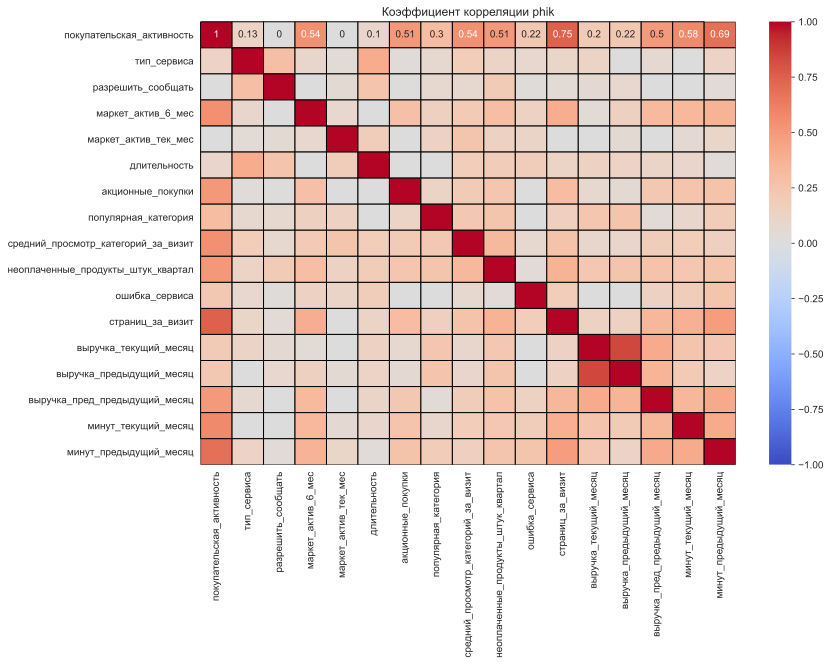

In [81]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['маркет_актив_6_мес',
                 'длительность',
                 'выручка_текущий_месяц',
                 'выручка_предыдущий_месяц',
                 'выручка_пред_предыдущий_месяц',
                 'минут_предыдущий_месяц',
                 'минут_текущий_месяц',
                 'акционные_покупки',
                 'средний_просмотр_категорий_за_визит',
                 'неоплаченные_продукты_штук_квартал',
                 'ошибка_сервиса',
                 'страниц_за_визит'
                ]

plt.figure(figsize=(12,8))
sns.heatmap(
    total_df.drop(['id', 'покупательская_активность_encoded'], axis = 1).phik_matrix(interval_cols=interval_cols, verbose=False), 
    annot = True,
    vmin=-1, 
    vmax=1, 
    cmap='coolwarm',
    linewidths=1, 
    linecolor='black'
)
plt.title('Коэффициент корреляции phik')
plt.show()

**Вывод:**
- Целевой признак: покупательская_активность.   

Остальные - входные.  
Как наш целевой признак взаимодейтсвует с остальными:  
- тип_сервиса - 0.13 - Слабая, практически отсутствует. 
- разрешить_сообщать - 0.00 - Отсутствует 
- маркет_актив_6 мес - 0.54 - Заметная 
- маркет_актив_тек_мес - 0.00 - Отсутствует 
- длительность 0.10 - Слабая, практически отсутствует 
- акционные_покупки - 0.51 - Заметная 
- популярная_категория - 0.30 - Умеренная 
- средний_просмотр_категорий_за_визит - 0.54 - Заметная 
- неоплаченные_продукты_штук_квартал - 0.51 - Заметная 
- ошибка_сервиса - 0.22 - Слабая 
- страниц_за_визит - 0.75 - Высокая (самая высокая взаимосвязь)
- выручка_текущий_месяц - 0.20 - Слабая 
- выручка_предыдущий_месяц - 0.22 - Слабая 
- выручка_предпредыдущий_месяц - 0.50 - Заметная 
- минут_текущий_месяц - 0.58 - Заметная 
- минут_предыдущий_месяц - 0.69 Заметная (занимает второе место)  

При мультиколлинеральноси имеются взаимосвязи т 0.9 до 0.95 по модулю.
Таких значений у нас нет, следовательно можно сделать вывод об отсутствии мультиколлинеарности.

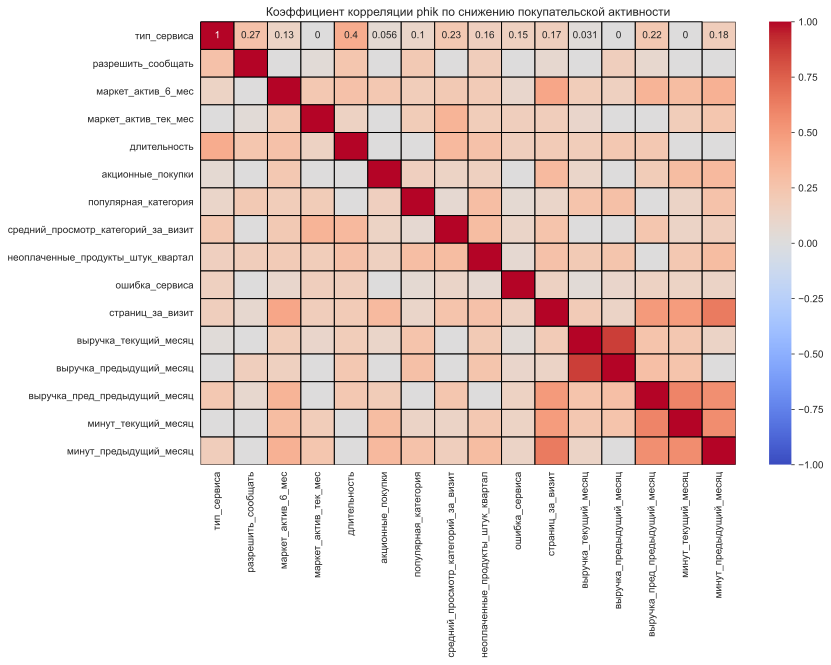

In [82]:
# создаём список с наименованиями непрерывных признаков
interval_cols = ['маркет_актив_6_мес',
                 'длительность',
                 'выручка_текущий_месяц',
                 'выручка_предыдущий_месяц',
                 'выручка_пред_предыдущий_месяц',
                 'минут_предыдущий_месяц',
                 'минут_текущий_месяц',
                 'акционные_покупки',
                 'средний_просмотр_категорий_за_визит',
                 'неоплаченные_продукты_штук_квартал',
                 'ошибка_сервиса',
                 'страниц_за_визит'
                ]

plt.figure(figsize=(12,8))
sns.heatmap(
    total_df.drop(['id'], axis=1).query('покупательская_активность_encoded == 1', engine='python').phik_matrix(interval_cols=interval_cols, verbose=False)
, 
    annot = True,
    vmin=-1, 
    vmax=1, 
    cmap='coolwarm',
    linewidths=1, 
    linecolor='black'
)
plt.title('Коэффициент корреляции phik по снижению покупательской активности')
plt.show()

Посмотрим как признаки взаимодействуют между собой при сортировки целевого признака (снижение), наибольшую корреляцию имеют между собой признаки: выручка за предыдущий месяц и выручка за текущий месяц - 0,87. На втором месте страниц за визит и минут предыдущий месяц - 0,63
Так как при мультиколлинеральноси имеются взаимосвязи т 0.9 до 0.95 по модулю. Таких значений у нас нет, следовательно можно сделать вывод об отсутствии мультиколлинеарности

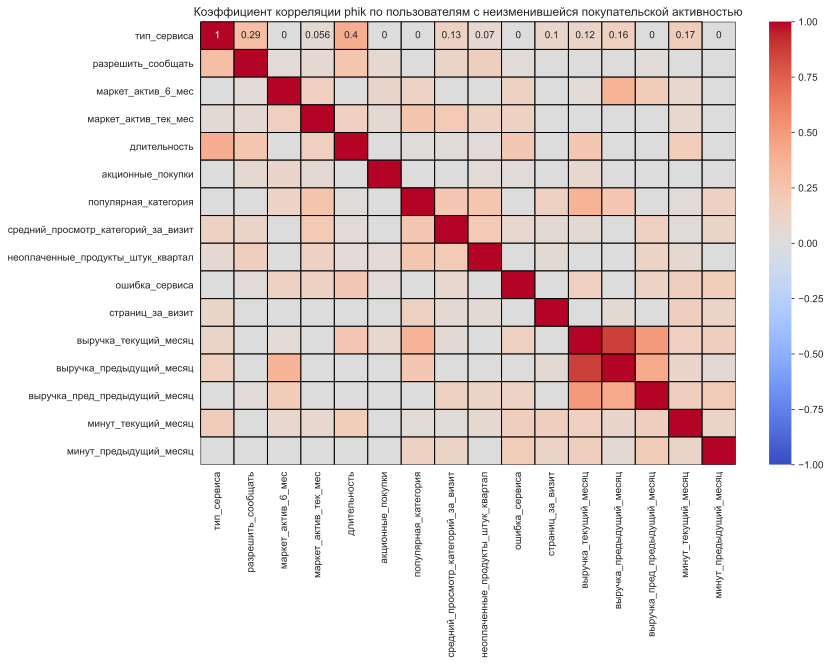

In [83]:
interval_cols = ['маркет_актив_6_мес',
                 'длительность',
                 'выручка_текущий_месяц',
                 'выручка_предыдущий_месяц',
                 'выручка_пред_предыдущий_месяц',
                 'минут_предыдущий_месяц',
                 'минут_текущий_месяц',
                 'акционные_покупки',
                 'средний_просмотр_категорий_за_визит',
                 'неоплаченные_продукты_штук_квартал',
                 'ошибка_сервиса',
                 'страниц_за_визит'
                ]

plt.figure(figsize=(12,8))
sns.heatmap(
    total_df.query('покупательская_активность_encoded == 0', engine='python').drop(['id'], axis = 1).phik_matrix(interval_cols=interval_cols, verbose=False), 
    annot = True,
    vmin=-1, 
    vmax=1, 
    cmap='coolwarm',
    linewidths=1, 
    linecolor='black'
)
plt.title('Коэффициент корреляции phik по пользователям с неизменившейся покупательской активностью')
plt.show()

Посмотрим как признаки взаимодействуют между собой при сортировки целевого признака (без изменений активности), наибольшую корреляцию имеют между собой признаки: выручка за предыдущий месяц и выручка за текущий месяц - 0,87. 
Второе место изменилось его заняло: выручка за предпредыдущий месяц и выручка за текущий месяц - 0,5
Страниц за визит и минут предыдущий месяц - 0,12 (существенно отличается от случая при снижении активности)
Так как при мультиколлинеральноси имеются взаимосвязи т 0.9 до 0.95 по модулю. Таких значений у нас нет, следовательно можно сделать вывод об отсутствии мультиколлинеарности

## Использование пайплайнов

### Проверка на дисбалланс

Дисбаланс классов (англ. class imbalance) — это непропорциональное соотношение классов в данных, когда наблюдений каких-то классов значительно больше остальных. Дисбаланс затрудняет обучение модели.

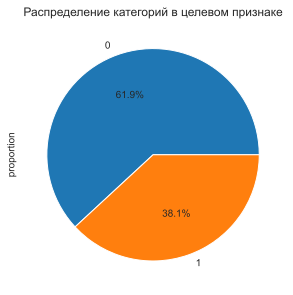

покупательская_активность_encoded
0   0.62
1   0.38
Name: proportion, dtype: float64

In [84]:
total_df.покупательская_активность_encoded.value_counts(normalize=True).plot(autopct='%1.1f%%', kind='pie', rot=0 )
plt.title('Распределение категорий в целевом признаке')
plt.show()
total_df.покупательская_активность_encoded.value_counts(normalize=True)

Видим явный дисбалланс классов 
- мажорный класс — активность осталось на прежнем уровне 62%
- минорный класс — активность снизилась 38%
для решения данной проблемы используем стратификацию 

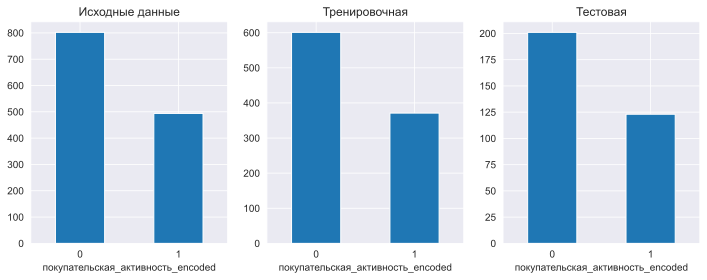

In [85]:
# делим на целевой и все остальные признаки
X = total_df.drop(columns=['покупательская_активность_encoded', 'покупательская_активность', 'id'], axis=1)
y = total_df.покупательская_активность_encoded

# разбивка данных на выборки с учётом стратификации по целевому признаку
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE, stratify=y
) 

# визуализация баланса целевого признака в выборках
fig, ax = plt.subplots(1,3, figsize=(12,4))
y.value_counts().plot(kind='bar', ax=ax[0], rot=0)
ax[0].set_title("Исходные данные")
y_train.value_counts().plot(kind='bar', ax=ax[1], rot=0)
ax[1].set_title("Тренировочная")
y_test.value_counts().plot(kind='bar', ax=ax[2], rot=0)
ax[2].set_title("Тестовая")
plt.show()

Поставленная задача:  
- Во время подготовки данных используйте `ColumnTransformer`.     
- Количественные и категориальные признаки обработайте в пайплайне раздельно.   
- Для кодирования категориальных признаков используйте как минимум `два кодировщика`, 
- для масштабирования количественных — как минимум `два скейлера`. 

- для каждой модели можно подготовить данные с разным кодированием и масштабированием.  
- Обучите четыре модели: `KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC()`.     
- Для каждой из них подберите как минимум один гиперпараметр.   
- Выберите подходящую для задачи метрику, аргументируйте свой выбор.   
- Используйте эту метрику при подборе гиперпараметров.

Создаём конвейер(пайплайн), который поможет найти оптимальное сочетание модели и гиперпараметров.

**Используем модели:**
- `DecisionTreeClassifier()` (дерево решений) с гиперпараметрами 
    - `max_depth` от 2 до 5 включительно ((глубина) каждого дерева в модели) и 
    - `max_features` от 2 до 5 включительно. (max_features — максимальное количество признаков, которые могут быть перебраны при разбиении вершины дерева)
- `KNeighborsClassifier()` (ближайшие соседи) с гиперпараметром 
    - n_neighbors от 2 до 5 включительно (количество ближайших соседей, используемых для предсказания).
- `LogisticRegression(solver='liblinear', penalty='l1')` (логистическая регрессия) с гиперпараметром регуляризации 
    - С от 1 до 4 включительно.

* solver — строка (по умолчанию liblinear), которая решает, какой решатель использовать для подбора модели.  
penalty — строка (по умолчанию ‘l2‘), которая определяет, есть ли регуляризация и какой подход использовать. Другие варианты: l1  
* L1-регуляризация помогает отобрать признаки для модели. Она позволяет обнулить коэффициенты части признаков и избавить модель от лишнего балласта.  
* C («сила» модели) — положительное число с плавающей запятой (1.0 по умолчанию), которое определяет относительную силу регуляризации. Меньшие значения указывают на более сильную регуляризацию. 
- `SVC()` (метод опорных векторов) с полиномиальным ядром гиперпараметрами
    - глубина degree от 1 до 5 включительно
    - Параметр регуляризации (C)

После того как мы выберем наиболее эффективную модель, необходимо вычислить метрику ROC-AUC на обучающем и тестовом наборах данных.

Отдадим предпочтение именно ROC-AUC, потому что эта метрика наилучшим образом подходит для задачи бинарной классификации с несбалансированным целевым признаком.

ROC-AUC (Receiver Operating Characteristic — Area Under Curve, рабочая характеристика приёмника — площадь под кривой) представляет собой меру способности классификатора различать классы и используется в качестве обобщающего показателя для кривой ROC.

Данные уже разделины, проверим размерость выборок

In [86]:
X_train.shape, X_test.shape

((972, 16), (324, 16))

In [87]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   id                                   1296 non-null   int32   
 1   покупательская_активность            1296 non-null   category
 2   тип_сервиса                          1296 non-null   category
 3   разрешить_сообщать                   1296 non-null   category
 4   маркет_актив_6_мес                   1296 non-null   float32 
 5   маркет_актив_тек_мес                 1296 non-null   int32   
 6   длительность                         1296 non-null   int32   
 7   акционные_покупки                    1296 non-null   float32 
 8   популярная_категория                 1296 non-null   category
 9   средний_просмотр_категорий_за_визит  1296 non-null   int32   
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int32   
 11  ошибка_сервиса   

Создадим три переменные для кодировщиков:

1. Для кодирования One-Hot Encoder признака «популярная_категория» (содержит несколько признаков, которые невозможно закодировать в порядковом виде).
1. Для кодирования OrdinalEncoder признаков «тип_сервиса» и «разрешить_сообщать» (возможно присвоить порядковые значения).
1. Для масштабирования или стандартизации всех остальных числовых признаков (int и float).

In [88]:
# признаки для кодирования One-Hot Encoder
ohe_columns = ['популярная_категория']
# признаки для кодирования OrdinalEncoder
ord_columns = ['тип_сервиса', 'разрешить_сообщать']
# признаки для масштабирования/стандартизации
num_columns = ['маркет_актив_6_мес', 
               'маркет_актив_тек_мес', 
               'длительность', 
               'акционные_покупки', 
               'средний_просмотр_категорий_за_визит', 
               'неоплаченные_продукты_штук_квартал', 
               'ошибка_сервиса', 
               'страниц_за_визит', 
               'выручка_текущий_месяц', 
               'выручка_предыдущий_месяц', 
               'выручка_пред_предыдущий_месяц', 
               'минут_текущий_месяц', 
               'минут_предыдущий_месяц']

### Создание пайплайна

#### добавляем OHE-кодирование в пайплайн

In [89]:
ohe_pipe = Pipeline(
    [
        (
            "simpleImputer_ohe",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
        (
            "ohe",
            OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False),
        ),
    ]
)

#### Создаём пайплайн для обработки признаков из списка ord_columns: кодирование и заполнение пропусков.

In [90]:
ord_pipe = Pipeline(
    [
        (
            "simpleImputer_before_ord",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
        (
            "ord",
            OrdinalEncoder(
                categories=[
                    ["стандарт", "премиум"],
                    ["да", "нет"],
                ],
                handle_unknown="use_encoded_value",
                unknown_value=np.nan,
            ),
        ),
        (
            "simpleImputer_after_ord",
            SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
        ),
    ]
)

#### создаём общий пайплайн для подготовки данных

In [91]:
data_preprocessor = ColumnTransformer(
    [
        ("ohe", ohe_pipe, ohe_columns),
        ("ord", ord_pipe, ord_columns),
        ("num", MinMaxScaler(), num_columns),
    ],
    remainder="passthrough",
)

#### создаём итоговый пайплайн: подготовка данных и модель

In [92]:
pipe_final = Pipeline(
    [
        ("preprocessor", data_preprocessor),
        ("models", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ]
)

Гиперпараметры модели — это настройки, которые определяют структуру и способ обучения. Они устанавливаются до начала обучения и не изменяются в процессе. Эти параметры влияют на обучение, учёт признаков и ограничения процесса. Устанговим их для каждой модели.

In [93]:
param_distributions = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 8),
        'models__max_features': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

Используем метод RandomizedSearchCV для случайного поиска гиперпараметров. В отличие от перебора всех комбинаций, случайный поиск позволяет выбрать случайные наборы значений для каждого гиперпараметра. Это ускоряет процесс и помогает быстрее найти оптимальные значения.

<b>Аргументация выбора случайного поиска (Random Search)</b> для гиперпараметров заключается в следующем. Случайный поиск — это метод, который выбирает случайные наборы значений для каждого гиперпараметра, вместо того чтобы перебирать все возможные комбинации. Это позволяет сократить время на поиск оптимальных параметров и делает метод эффективным, особенно при ограниченных ресурсах.

In [94]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions, 
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
)
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_b...
                                                               'passthrough']},
                                        {'models': [KNeighborsClassifier()],
                                         'models__n_neighbors': range(2, 6),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(penalty='l1',
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [95]:
print('Лучшая модель и её параметры:')
display(randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(stra...
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'выручка_текущий_месяц',
                                                   'выручка_предыдущий_месяц',
                                                   'выручка_пред_предыдущий_месяц',
                                                   'минут_текущий_месяц',
                                                   'минут_предыдущий_месяц'])])),
                ('models',
                 LogisticRegression(C=1, penalty='l1', random_state=42,
                                    solver='liblinear'))])

Метрика лучшей модели на тренировочной выборке: 0.8962615640433821


**Получили лучшую модель: 
LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear')**

Проверим модель на тестовых данных и вычислим метрику.

In [96]:
pipe_final.fit(X_train, y_train) 
y_test_pred_proba = randomized_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred_proba).round(3)}')

Метрика ROC-AUC на тестовой выборке: 0.917


Создадим таблицу из данных cv_results_, чтобы наглядно увидеть результаты оценки по различным параметрам. В этой таблице rank_test_score:
- указывает ранг комбинации параметров поиска
- param_models — параметры модели
- а mean_test_score — среднее значение, вычисленное для всех выборок с одинаковым весом.

In [97]:
pd.DataFrame(randomized_search.cv_results_)[
    ['params', 'std_test_score', 'rank_test_score', 'param_models', 'mean_test_score']
].sort_values('rank_test_score').head(3)

params  \
3  {'preprocessor__num': StandardScaler(), 'models__C': 1, 'models': LogisticRegression(penalty='l1', random_state=42, solver='liblinear')}   
8  {'preprocessor__num': StandardScaler(), 'models__C': 5, 'models': LogisticRegression(penalty='l1', random_state=42, solver='liblinear')}   
0                                       {'preprocessor__num': StandardScaler(), 'models__n_neighbors': 4, 'models': KNeighborsClassifier()}   

   std_test_score  rank_test_score  \
3            0.02                1   
8            0.02                2   
0            0.01                3   

                                                            param_models  \
3  LogisticRegression(penalty='l1', random_state=42, solver='liblinear')   
8  LogisticRegression(penalty='l1', random_state=42, solver='liblinear')   
0                                                 KNeighborsClassifier()   

   mean_test_score  
3             0.90  
8             0.90  
0             0.88

**Вывод по разделу:** 
  
Построили пайплайн и выбрали лучшую комбинацию модели и гиперпараметров с использованием четырёх моделей:

- `DecisionTreeClassifier()` (дерево решений) с гиперпараметрами 
    - `max_depth` от 2 до 8 включительно ((глубина) каждого дерева в модели) и 
    - `max_features` от 2 до 6 включительно. (max_features — максимальное количество признаков, которые могут быть перебраны при разбиении вершины дерева)
- `KNeighborsClassifier()` (ближайшие соседи) с гиперпараметром 
    - n_neighbors от 2 до 5 включительно (количество ближайших соседей, используемых для предсказания).
- `LogisticRegression(solver='liblinear', penalty='l1')` (логистическая регрессия) с гиперпараметром регуляризации 
    - С от 1 до 10 включительно.

* solver — строка (по умолчанию liblinear), которая решает, какой решатель использовать для подбора модели.  
penalty — строка (по умолчанию ‘l2‘), которая определяет, есть ли регуляризация и какой подход использовать. Другие варианты: l1  
* L1-регуляризация помогает отобрать признаки для модели. Она позволяет обнулить коэффициенты части признаков и избавить модель от лишнего балласта.  
* C («сила» модели) — положительное число с плавающей запятой (1.0 по умолчанию), которое определяет относительную силу регуляризации. Меньшие значения указывают на более сильную регуляризацию. 
  
**Лучшая модель:**

`LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear')`

- Метрика  ROC-AUC лучшей модели на тренировочной выборке: 0.8962615640433821
- Метрика ROC-AUC на тестовой выборке: 0.917

## Анализ важности признаков

### Обучим модель в соответствии с подобранными лучшими данными

In [98]:
# кодируем категориальные признаки с помощью OneHotEncoder()
ohe_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_train_ohe = ohe_encoder.fit_transform(X_train[ohe_columns])
X_test_ohe = ohe_encoder.transform(X_test[ohe_columns])
ohe_encoder_col_names = ohe_encoder.get_feature_names_out()

# кодируем категориальные признаки с помощью OrdinalEncoder()
ord_encoder = OrdinalEncoder(categories=[
    ["стандарт", "премиум"],
    ["да", "нет"],
],
                             handle_unknown="use_encoded_value", unknown_value=np.nan,)
X_train_ord = ord_encoder.fit_transform(X_train[ord_columns])
X_test_ord = ord_encoder.transform(X_test[ord_columns])
ord_encoder_col_names = ord_encoder.get_feature_names_out()

# масштабируем количественные признаки с помощью StandardScaler()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_columns])
X_test_scaled = scaler.transform(X_test[num_columns])

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_encoder_col_names)

X_train_ord = pd.DataFrame(X_train_ord, columns=ord_encoder_col_names)
X_test_ord = pd.DataFrame(X_test_ord, columns=ord_encoder_col_names)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_columns)

# объединяем все преобразованные данные в тренировочный и тестовый датафреймы
X_train_first = pd.concat([X_train_ohe, X_train_ord], axis=1)
X_train_final = pd.concat([X_train_first, X_train_scaled], axis=1)

X_test_first = pd.concat([X_test_ohe, X_test_ord], axis=1)
X_test_final = pd.concat([X_test_first, X_test_scaled], axis=1)

# проверяем размерности выборок
print('Размерности выборок:')
print(X_train_final.shape) 
print(X_test_final.shape) 
print(y_train.shape) 
print(y_test.shape)

Размерности выборок:
(972, 20)
(324, 20)
(972,)
(324,)


In [99]:
# объявляем классификатор и обучаем модель на данных полученных из пайплайна как лучшие.
model_best = LogisticRegression(
    C=3, 
    penalty='l1', 
    random_state=42, 
    solver='liblinear'
)
model_best.fit(X_train_final, y_train)
y_pred = model_best.predict(X_test_final)

# в отдельную переменную сохраняем предсказания принадлежности к классам для тестовых данных
model_best_probas = model_best.predict_proba(X_test_final)[:,1]

# считаем метрику ROC-AUC для тренировочных и тестовых данных
print('Метрики model_best:')
roc_auc_cv = cross_val_score(model_best, X_train_final, y_train, scoring='roc_auc').mean()
print(f'ROC-AUC на тренировочной выборке: {round(roc_auc_cv, 3)}')
print(f'ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, model_best_probas), 3)}') # Используем вероятности

# оценка качества модели по метрике accuracy
model_best_acc = accuracy_score(y_test, y_pred)
print('Accuracy:', round(model_best_acc, 3))

# выводим F1-меру
model_best_f1 = f1_score(y_test, y_pred, pos_label=1)
print('F1-score:', round(model_best_f1, 3))

Метрики model_best:
ROC-AUC на тренировочной выборке: 0.896
ROC-AUC на тестовой выборке: 0.916
Accuracy: 0.904
F1-score: 0.867


#### Оценка качества с помощью dummy_model.

In [100]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Создаём и обучаем DummyClassifier
dummy_model = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)  # Или 'stratified'
dummy_model.fit(X_train, y_train)

# Получаем предсказания и вероятности
dummy_model_preds = dummy_model.predict(X_test)
dummy_model_probas = dummy_model.predict_proba(X_test)[:, 1]

# Рассчитываем метрики
dummy_acc = accuracy_score(y_test, dummy_model_preds)
dummy_roc = roc_auc_score(y_test, dummy_model_probas)
dummy_f1 = f1_score(y_test, dummy_model_preds, pos_label=1)

# Выводим результаты
print('Dummy Classifier Performance:')
print('Accuracy:', round(dummy_acc, 2))
print('ROC-AUC:', round(dummy_roc, 2))
print('F1-score:', round(dummy_f1, 2))

# Добавим предупреждение о возможной неинформативности результатов
if dummy_acc > 0.5:  # Порог можно настроить в зависимости от задачи
    print("Предупреждение: результаты DummyClassifier могут быть неинформативными при высоком значении accuracy.")

Dummy Classifier Performance:
Accuracy: 0.62
ROC-AUC: 0.5
F1-score: 0.0
Предупреждение: результаты DummyClassifier могут быть неинформативными при высоком значении accuracy.


Поскольку показатели на dummy_model ниже, чем у нашей модели, можно сделать вывод, что наша модель работает эффективно.

Метрики model_best:
- ROC-AUC на тренировочной выборке: 0.896
- ROC-AUC на тестовой выборке: 0.888
- Accuracy: 0.904
- F1-score: 0.867

#### Построение матрицы ошибок для тестовых данных функцией ConfusionMatrixDisplay()

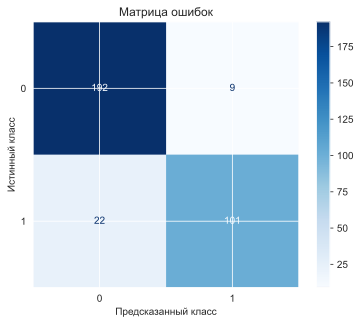

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       201
           1       0.92      0.82      0.87       123

    accuracy                           0.90       324
   macro avg       0.91      0.89      0.90       324
weighted avg       0.91      0.90      0.90       324



In [101]:
ConfusionMatrixDisplay.from_estimator(model_best, X_test_final, y_test, cmap=plt.cm.Blues)
plt.title('Матрица ошибок')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()
print(classification_report(y_test, y_pred))

Модель верно предсказала:

- класс 0(прежний уровень) - 192 раза
- класс 1 (снизилась) - 101 раз

Модель ошиблась:
- ошибка Ложнонегативное - 22 раза (предсказала что активность останется на прежнем уровне, а она снизилась)
- ошибка Ложнопозитивное - 9 раза(предсказала что активность снизится, а она осталась на прежнем уровне)

#### Анализ порогов

сдвиг порога классификации подстраивает модель под наши нужды и повышает качество решений.
Чаще всего этот метод используют, чтобы откалибровать ошибки модели FN и FP и повысить метрики accuracy, precision, recall и F1-меру.
Но он никак не повлияет на ROC-AUC, поскольку она учитывает все возможные пороги.
Сдвиг порога может помочь и при дисбалансе классов. Изменив вероятность, достаточную для отнесения к старшему классу, вы можете заставить модель чаще присваивать объектам минорный класс.

In [102]:
# создаём пустые списки для добавления элементов
thresholds = np.linspace(0,1, 9)
columns = []
precision = []
recall = []
roc_auc = []
f1_sc = []
false_positive = []
false_negative = []
true_positive = []
true_negative = []

# наполняем списки значениями
for i in thresholds:
    columns.append('y_pred_'+str(i))
    preds = np.where(model_best.predict_proba(X_test_final)[:,1] > i, 1, 0)
    precision.append(round(precision_score(y_test, preds), 2))
    recall.append(round(recall_score(y_test, preds), 2))
    roc_auc.append(round(roc_auc_score(y_test, preds), 2))
    f1_sc.append(round(f1_score(y_test, preds), 2))   
    false_positive.append(confusion_matrix(y_test, preds)[0, 1])
    false_negative.append(confusion_matrix(y_test, preds)[1, 0])
    true_positive.append(confusion_matrix(y_test, preds)[1, 1])
    true_negative.append(confusion_matrix(y_test, preds)[0, 0])

max_f1_idx = np.argmax(np.array(f1_sc))
best_threshold = thresholds[max_f1_idx]

# формируем датафрем из получившихся списков    
frame = pd.DataFrame(zip(columns, 
                         precision, 
                         recall,
                         roc_auc, 
                         f1_sc,
                         false_positive, 
                         false_negative, 
                         true_positive, 
                         true_negative), 
                     columns = ['Порог', 
                                'precision', 
                                'recall', 
                                'roc_auc', 
                                'f1_score',
                                'false_positive', 
                                'false_negative', 
                                'true_positive ', 
                                'true_negative']) 

# выводим датафрем с перебором порогов на экран
display(frame)
print(f' лучший порог: {best_threshold}')

Порог  precision  recall  roc_auc  f1_score  false_positive  \
0    y_pred_0.0       0.38    1.00     0.50      0.55             201   
1  y_pred_0.125       0.55    0.90     0.72      0.68              91   
2   y_pred_0.25       0.70    0.86     0.82      0.77              45   
3  y_pred_0.375       0.82    0.83     0.86      0.82              23   
4    y_pred_0.5       0.92    0.82     0.89      0.87               9   
5  y_pred_0.625       0.99    0.80     0.90      0.89               1   
6   y_pred_0.75       1.00    0.72     0.86      0.84               0   
7  y_pred_0.875       1.00    0.56     0.78      0.72               0   
8    y_pred_1.0       0.00    0.00     0.50      0.00               0   

   false_negative  true_positive   true_negative  
0               0             123              0  
1              12             111            110  
2              17             106            156  
3              21             102            178  
4              22             101            192  
5              24              99            200  
6              34              89            201  
7              54              69            201  
8             123               0            201

 лучший порог: 0.625


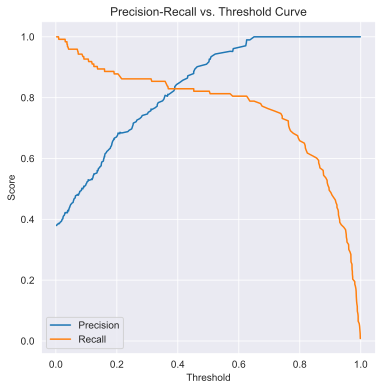

In [103]:
precision, recall, thresholds = precision_recall_curve(y_test, model_best_probas)

plt.figure(figsize=(6, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs. Threshold Curve')
plt.grid(True)
plt.show()

Если уменьшить порог, то показатели модели сильно ухудшатся.

При False Negative, равном 12 (при пороге 0,125), модель ошибочно предскажет снижение покупательской активности для тех клиентов, которые в эту группу не входят. В результате заказчик может принять неправильное решение и отправить промокоды тем, кто в них не нуждается. Это приведёт к потерям, так как пользователи, готовые покупать товар и без промокодов, заплатят меньше.

Если установить порог на уровне 0,25, мы получим False Negative равный 17. При этом False Positive составит 44. Если поднять порог до 0,375, False Negative увеличится до 21, а False Positive — до 23.

Оптимальным порогом можно считать 0,5. В этом случае False Negative будет равен 22, а False Positive — 9. Хотя при пороге 0,625 False Negative уменьшается до 24, а False Positive снижается до 1, разница в результатах не столь значительна, чтобы оправдать возможные риски. Окончательное решение о том, какой порог использовать, зависит от конкретных условий и целей бизнеса.

### Посмотрим какие признаки имеют больший вес

In [104]:
model_best.coef_[0]

array([-0.19134237, -0.28249184, -1.15833093, -0.63545126, -0.25690138,
       -0.06990379, -0.11780983, -0.44338399,  0.04316054,  0.09836476,
        0.62273035, -0.64410263,  0.54340872, -0.14137593, -0.66349998,
       -0.28991853,  0.32780243, -0.27947359, -0.49097282, -0.5895757 ])

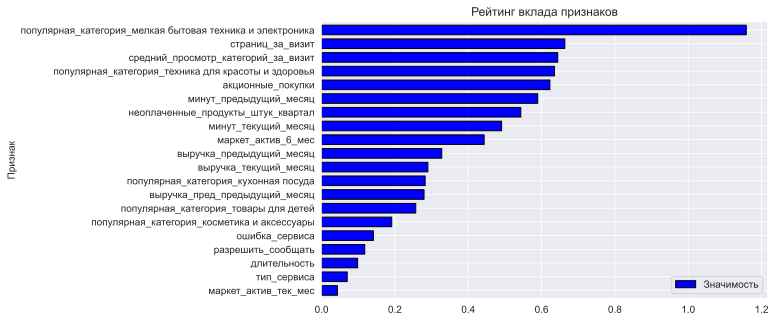

In [105]:
# отложим значения коэффициентов на графике
coeffs = model_best.coef_[0]
attribute_weight = pd.DataFrame(
    {
        'Признак': X_train_final.columns, 
        'Значимость': np.abs(coeffs)
    }
)
attribute_weight = attribute_weight.sort_values(
    by='Значимость', 
    ascending=True
)
attribute_weight.plot(
    x='Признак', 
    y='Значимость',
    kind='barh', 
    figsize=(8, 5), 
    ec='black', 
    lw=1, 
    color='b', 
    width=0.7)
plt.legend()
plt.ylabel('Признак')
plt.title('Рейтинг вклада признаков')
plt.show()

Наибольше влияние имеют:
- популярная категория мелкая бытовая техника и электроника
- страниц за визит
- средний просмотр категорий за визит
- популярная категория техника для красоты и здоровья
- акционные покупки

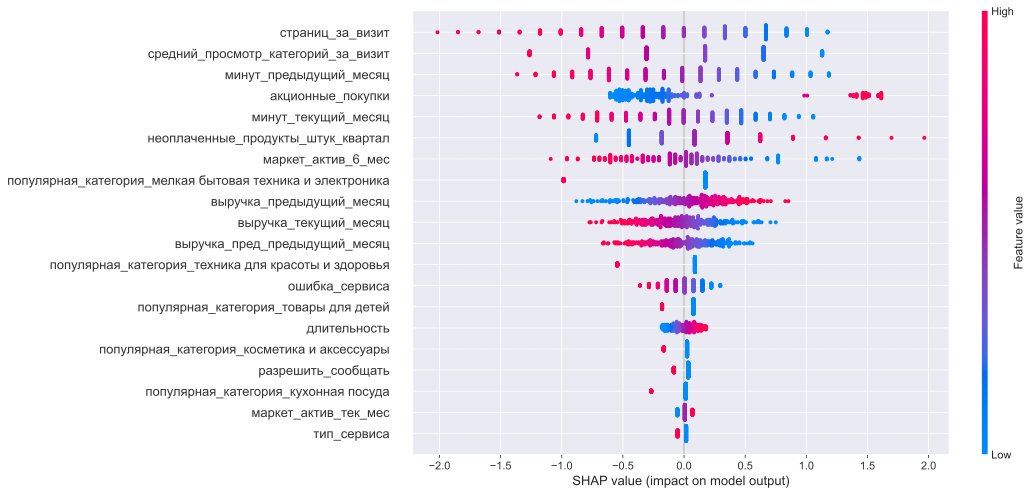

In [106]:
# строим график общей значимости признаков для лучшей модели
attribute_weight_model_best = shap.Explainer(model_best, X_test_final)
shap_values = attribute_weight_model_best(X_test_final)
shap.plots.beeswarm(shap_values, max_display=20, plot_size=[12, 8])

Негативные значения Шепли, расположенные слева от центральной вертикальной линии, указывают на то, что признак способствует отнесению объектов к классу 0, а положительные значения справа — к классу 1. Толщина вертикальных линий показывает, сколько наблюдений сгруппировано вместе: у них близкие значения SHAP. Это означает, что модель уверенно присваивает SHAP-значения, учитывая закономерности в данных. Цвет точки отражает значения каждого признака объекта: чем краснее объект, тем больше значение признака, указанного на оси Y.

анализ SHAP-значений  
общий вклад признаков (топ 5)

- страниц_за_визит
- средний_просмотр_категорий_за_визит
- минут_предыдущий_месяц
- акционные_покупки
- минут_текущий_месяц

Исходя из визуализации SHAP-значений:

- высокие значения страниц_за_визит и минут_предыдущий_месяц уменьшают значения SHAP-объектов (расположены слева), следовательно признак склоняет модель отнести объекты к классу 0
- высокие значения акционные_покупки увеличивают значения SHAP-объектов (расположены справа) и увеличивают вероятность следовательно признак склоняет модель отнести объекты к классу 1

<b>Совет для бизнеса:</b>

Наличие акционных предложений существенно влияет на покупательскую активность. Акции радуют клиентов и стимулируют их совершать покупки, которые изначально могли не планироваться.

Кроме того, важно создать условия, чтобы клиенты проводили больше времени на сайте: обеспечить удобство использования, привлекательный интерфейс, предложить интересные товары. Это увеличит вероятность покупки и принесёт бизнесу приб****

## Сегментация покупателей

In [107]:
# предсказания принадлежности к классам для тестовых данных
model_best_probas_train = model_best.predict_proba(X_train_final)[:, 1]

# предсказания для тренировочной выборки
X_pred = model_best.predict(X_train_final)

# объединяем выборки которые были разбиты для обучения
tot_train = pd.concat([X_train, y_train], axis=1)
tot_test = pd.concat([X_test, y_test], axis=1)

# добавялем столбцы с прогнозами
tot_train['прогнозируемая_вероятность_probas'] = model_best_probas_train.tolist()
tot_train['прогноз_покупательской_активности'] = X_pred.tolist()
# Напомним что в model_best_probas сохранили предсказания принадлежности к классам для тестовых данных
tot_test['прогнозируемая_вероятность_probas'] = model_best_probas.tolist()
tot_test['прогноз_покупательской_активности'] = y_pred.tolist()
# объединяем и добавялем столбец 'id', для последующего объединения с таблицей df_money
final_best_df = pd.concat([tot_train, tot_test])
final_best_df = pd.merge(
    final_best_df, total_df['id'], left_index=True, right_index=True
)

final_best_df['покупательская_активность_encoded'] = final_best_df[
    'покупательская_активность_encoded'
].apply(lambda value: 'снизилась' if value == 1 else 'не изменилась')
final_best_df['прогноз_покупательской_активности'] = final_best_df[
    'прогноз_покупательской_активности'
].apply(lambda value: 'снизилась' if value == 1 else 'не изменилась')

final_best_df = final_best_df.merge(df_money, on='id')
final_best_df['выручка_за_три_месяца'] = (
    final_best_df['выручка_текущий_месяц']
    + final_best_df['выручка_предыдущий_месяц']
    + final_best_df['выручка_пред_предыдущий_месяц']
)

final_best_df.head(5).T

0  \
тип_сервиса                                                      стандарт   
разрешить_сообщать                                                     да   
маркет_актив_6_мес                                                   5.50   
маркет_актив_тек_мес                                                    4   
длительность                                                          510   
акционные_покупки                                                    0.15   
популярная_категория                 мелкая бытовая техника и электроника   
средний_просмотр_категорий_за_визит                                     2   
неоплаченные_продукты_штук_квартал                                      4   
ошибка_сервиса                                                          7   
страниц_за_визит                                                       16   
выручка_текущий_месяц                                             6014.20   
выручка_предыдущий_месяц                                          5170.50   
выручка_пред_предыдущий_месяц                                     4347.00   
минут_текущий_месяц                                                     6   
минут_предыдущий_месяц                                                 20   
покупательская_активность_encoded                           не изменилась   
прогнозируемая_вероятность_probas                                    0.05   
прогноз_покупательской_активности                           не изменилась   
id                                                                 215858   
прибыль                                                              4.37   
выручка_за_три_месяца                                            15531.70   

                                                                  1  \
тип_сервиса                                                стандарт   
разрешить_сообщать                                               да   
маркет_актив_6_мес                                             5.10   
маркет_актив_тек_мес                                              4   
длительность                                                    199   
акционные_покупки                                              0.23   
популярная_категория                 техника для красоты и здоровья   
средний_просмотр_категорий_за_визит                               4   
неоплаченные_продукты_штук_квартал                                5   
ошибка_сервиса                                                    2   
страниц_за_визит                                                  3   
выручка_текущий_месяц                                       3789.70   
выручка_предыдущий_месяц                                    6400.00   
выручка_пред_предыдущий_месяц                               4597.00   
минут_текущий_месяц                                              13   
минут_предыдущий_месяц                                           11   
покупательская_активность_encoded                         снизилась   
прогнозируемая_вероятность_probas                              0.80   
прогноз_покупательской_активности                         снизилась   
id                                                           215361   
прибыль                                                        4.03   
выручка_за_три_месяца                                      14786.70   

                                                                        2  \
тип_сервиса                                                      стандарт   
разрешить_сообщать                                                     да   
маркет_актив_6_мес                                                   4.30   
маркет_актив_тек_мес                                                    5   
длительность                                                          997   
акционные_покупки                                                    0.17   
популярная_категория                 мелкая бытовая техника и электроника   
средний_просмотр_категорий_за_визит               

Мы объединили таблицы, добавили данные о покупателях и создали новые столбцы с информацией о выручке за три месяца по каждому клиенту, вероятности оттока покупателей и прогнозе покупательской активности.

Для сегментации выберем группу покупателей с высокой вероятностью снижения активности. Порог установим на уровне 65%. Всё, что больше 0,65 в столбце «прогнозируемая_вероятность_probas», будет иметь значение «высокая вероятность снижения». Остальное — «низкая вероятность».

In [108]:
final_best_df["прогноз_покупательской_активности"] = final_best_df[
    "прогнозируемая_вероятность_probas"
].apply(
    lambda value: "Высокая вероятность снижения"
    if value > 0.65
    else "Низкая вероятность снижения"
)

In [109]:
final_best_df.head(5).T

0  \
тип_сервиса                                                      стандарт   
разрешить_сообщать                                                     да   
маркет_актив_6_мес                                                   5.50   
маркет_актив_тек_мес                                                    4   
длительность                                                          510   
акционные_покупки                                                    0.15   
популярная_категория                 мелкая бытовая техника и электроника   
средний_просмотр_категорий_за_визит                                     2   
неоплаченные_продукты_штук_квартал                                      4   
ошибка_сервиса                                                          7   
страниц_за_визит                                                       16   
выручка_текущий_месяц                                             6014.20   
выручка_предыдущий_месяц                                          5170.50   
выручка_пред_предыдущий_месяц                                     4347.00   
минут_текущий_месяц                                                     6   
минут_предыдущий_месяц                                                 20   
покупательская_активность_encoded                           не изменилась   
прогнозируемая_вероятность_probas                                    0.05   
прогноз_покупательской_активности             Низкая вероятность снижения   
id                                                                 215858   
прибыль                                                              4.37   
выручка_за_три_месяца                                            15531.70   

                                                                  1  \
тип_сервиса                                                стандарт   
разрешить_сообщать                                               да   
маркет_актив_6_мес                                             5.10   
маркет_актив_тек_мес                                              4   
длительность                                                    199   
акционные_покупки                                              0.23   
популярная_категория                 техника для красоты и здоровья   
средний_просмотр_категорий_за_визит                               4   
неоплаченные_продукты_штук_квартал                                5   
ошибка_сервиса                                                    2   
страниц_за_визит                                                  3   
выручка_текущий_месяц                                       3789.70   
выручка_предыдущий_месяц                                    6400.00   
выручка_пред_предыдущий_месяц                               4597.00   
минут_текущий_месяц                                              13   
минут_предыдущий_месяц                                           11   
покупательская_активность_encoded                         снизилась   
прогнозируемая_вероятность_probas                              0.80   
прогноз_покупательской_активности      Высокая вероятность снижения   
id                                                           215361   
прибыль                                                        4.03   
выручка_за_три_месяца                                      14786.70   

                                                                        2  \
тип_сервиса                                                      стандарт   
разрешить_сообщать                                                     да   
маркет_актив_6_мес                                                   4.30   
маркет_актив_тек_мес                                                    5   
длительность                                                          997   
акционные_покупки                                                    0.17   
популярная_категория                 мелкая бытовая техника и электроника   
средний_просмотр_категорий_за_визит               

Какой доход приносит магазину каждая продажа? Изучим данные.

In [110]:
final_best_df['прибыль'].describe()

count   1296.00
mean       4.00
std        1.01
min        0.86
25%        3.30
50%        4.05
75%        4.67
max        7.43
Name: прибыль, dtype: float64

Выберем сегменты покупателей с высокой и низкой вероятностью снижения активности, которые приносят бизнесу 75 % прибыли и больше.

Сегмент с покупателями подверженными снижению активности

In [111]:
selected_segment = final_best_df[
    (final_best_df["прибыль"] > 4.67)
    & (final_best_df["прогнозируемая_вероятность_probas"] > 0.65)
]

Сегмет с покупателями со стабильной активностью

In [112]:
selected_segment_good = final_best_df[
    (final_best_df["прибыль"] > 4.67)
    & (final_best_df["прогнозируемая_вероятность_probas"] < 0.65)
]

In [113]:
print('Количество покупателей сегмента с высокой прибыльностью и снижением активности:', 
      selected_segment['id'].count())
print('Количество покупателей сегмента с высокой прибыльностью и снижением активности:', 
      selected_segment_good['id'].count())

Количество покупателей сегмента с высокой прибыльностью и снижением активности: 96
Количество покупателей сегмента с высокой прибыльностью и снижением активности: 227


In [114]:
selected_segment.sort_values(by='прибыль', ascending=False)[['id', 
                                                             'прибыль',
                                                             'прогнозируемая_вероятность_probas',
                                                             'прогноз_покупательской_активности', 
                                                             'страниц_за_визит', 
                                                             'акционные_покупки', 
                                                             'популярная_категория', 
                                                             'тип_сервиса',
                                                             'разрешить_сообщать']].head(5)

id  прибыль  прогнозируемая_вероятность_probas  \
316   215401     7.43                               0.91   
1105  215563     6.88                               0.82   
902   215400     6.73                               0.99   
503   215561     6.59                               0.99   
1202  215505     6.55                               0.93   

     прогноз_покупательской_активности  страниц_за_визит  акционные_покупки  \
316       Высокая вероятность снижения                 4               0.30   
1105      Высокая вероятность снижения                 7               0.35   
902       Высокая вероятность снижения                 2               0.94   
503       Высокая вероятность снижения                 3               0.28   
1202      Высокая вероятность снижения                 3               0.31   

        популярная_категория тип_сервиса разрешить_сообщать  
316   косметика и аксессуары     премиум                 да  
1105  косметика и аксессуары     премиум                 да  
902         товары для детей    стандарт                нет  
503   косметика и аксессуары    стандарт                нет  
1202        товары для детей    стандарт                 да

### Изучим распределения вероятности снижения покупательской активности и прибыльности для выбранного сегмента

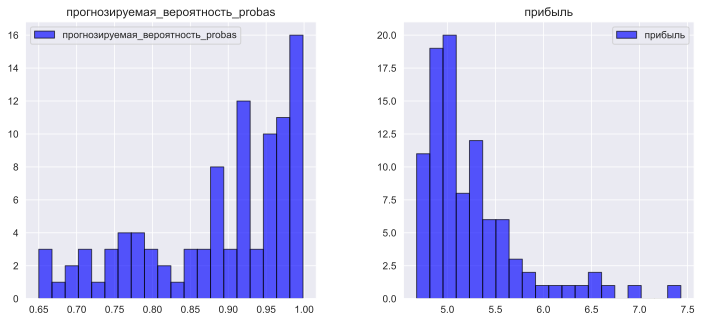

In [115]:
selected_segment[
    ["прогнозируемая_вероятность_probas", "прибыль"]
].hist(
    bins=20, 
    ec="black", 
    lw=1, 
    alpha=0.65, 
    legend=True, 
    figsize=(12, 5), 
    color="b"
)
plt.show()

У многих покупателей выбранного сегмента вероятность снижения активности близка к 0,85, что говорит о высокой вероятности потери интереса к покупкам.

Большинство покупателей приносят умеренную прибыль (до 0,6), но есть и очень прибыльные клиенты (выше 6,5). Это особенно заметно на фоне максимального показателя прибыльности для всех покупателей заказчика — 7,43.

### изучим прибыльность покупателей с низкой и высокой вероятностью снижения покупательской активности

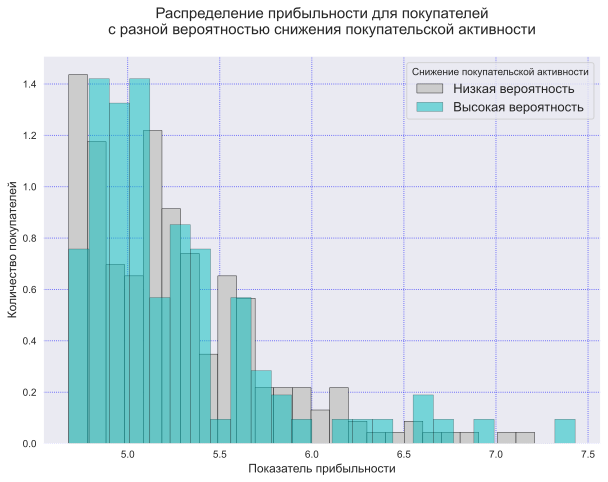

In [116]:
ax = selected_segment_good["прибыль"].plot(
    kind="hist",
    histtype="bar",
    density=True,
    bins=25,
    linewidth=5,
    label="raw",
    figsize=(10, 7),
    ec="black",
    lw=0.4,
    alpha=1,
    facecolor="0.8",
)

selected_segment["прибыль"].plot(
    kind="hist",
    histtype="bar",
    density=True,
    bins=25,
    linewidth=5,
    ax=ax,
    grid=False,
    figsize=(10, 7),
    ec="black",
    lw=0.4,
    alpha=0.5,
    facecolor="c",
)
plt.grid(linestyle="dotted", color='b', alpha=0.8)
plt.title(
    "Распределение прибыльности для покупателей\nс разной вероятностью снижения покупательской активности\n",
    size=15,
)
plt.xlabel("Показатель прибыльности", size=12)
plt.ylabel("Количество покупателей", size=12)
plt.legend(
    ["Низкая вероятность", "Высокая вероятность"],
    prop={"size": 13},
    title="Снижение покупательской активности",
)
plt.show()

### посмотрим на отношение покупателей сегментов к рассылкам

In [117]:
print('Разрешение на рекламные рассылки у покупателей с вероятностью снижения активности:')
print(selected_segment['разрешить_сообщать'].value_counts())
print('Разрешение на рекламные рассылки у покупателей с сохранением активности:')
print(selected_segment_good['разрешить_сообщать'].value_counts())

Разрешение на рекламные рассылки у покупателей с вероятностью снижения активности:
разрешить_сообщать
да     69
нет    27
Name: count, dtype: int64
Разрешение на рекламные рассылки у покупателей с сохранением активности:
разрешить_сообщать
да     159
нет     68
Name: count, dtype: int64


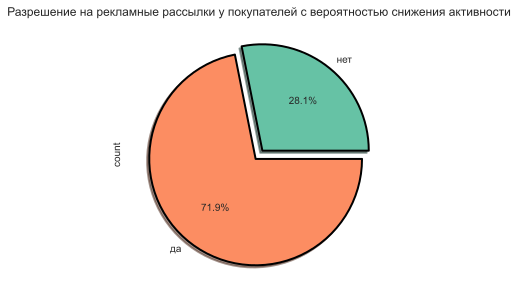

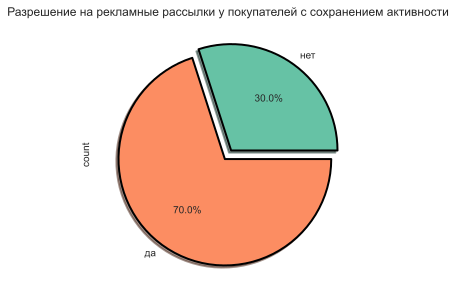

In [118]:
selected_segment["разрешить_сообщать"].value_counts(ascending=True).plot(
    kind="pie",
    grid=True,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2"),
    explode=[0.05, 0.05],
    shadow=True,
    wedgeprops={"edgecolor": "black", "linewidth": 2, "antialiased": True},
)
plt.title(
    "Разрешение на рекламные рассылки у покупателей с вероятностью снижения активности"
)
plt.show()
selected_segment_good["разрешить_сообщать"].value_counts(ascending=True).plot(
    kind="pie",
    grid=True,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2"),
    explode=[0.05, 0.05],
    shadow=True,
    wedgeprops={"edgecolor": "black", "linewidth": 2, "antialiased": True},
)
plt.title("Разрешение на рекламные рассылки у покупателей с сохранением активности")
plt.show()

### посмотрим на отношение покупателей сегментов к акционным покупкам

In [119]:
selected_segment[selected_segment["акционные_покупки"] > 0.8][
    "популярная_категория"
].value_counts(ascending=True)

популярная_категория
мелкая бытовая техника и электроника    1
косметика и аксессуары                  3
техника для красоты и здоровья          3
домашний текстиль                       5
кухонная посуда                         5
товары для детей                        7
Name: count, dtype: int64

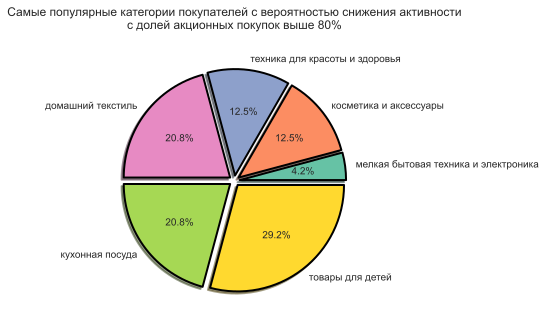

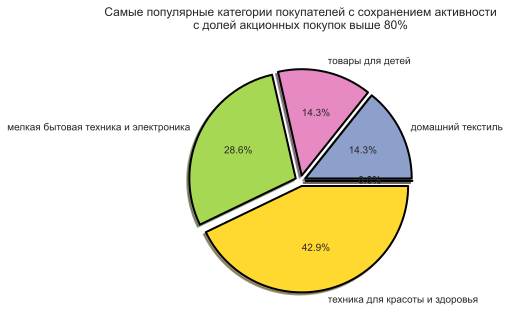

In [120]:
selected_segment[selected_segment["акционные_покупки"] > 0.8][
    "популярная_категория"
].value_counts(ascending=True).plot(
    kind="pie",
    grid=True,
    autopct="%1.1f%%",
    explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    colors=sns.color_palette("Set2"),
    shadow=True,
    wedgeprops={"edgecolor": "black", "linewidth": 2, "antialiased": True},
)
plt.title(
    "Самые популярные категории покупателей с вероятностью снижения активности\nс долей акционных покупок выше 80%\n"
)
plt.ylabel(None)

plt.show()
selected_segment_good[selected_segment_good["акционные_покупки"] > 0.8][
    "популярная_категория"
].value_counts(ascending=True).plot(
    kind="pie",
    grid=True,
    autopct="%1.1f%%",
    explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    colors=sns.color_palette("Set2"),
    shadow=True,
    wedgeprops={"edgecolor": "black", "linewidth": 2, "antialiased": True},
)
plt.title(
    "Самые популярные категории покупателей с сохранением активности\nс долей акционных покупок выше 80%\n"
)
plt.ylabel(None)
plt.show()

### посмотрим на отношение покупателей сегментов по типу сервиса

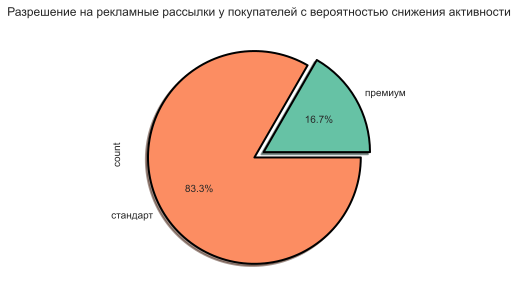

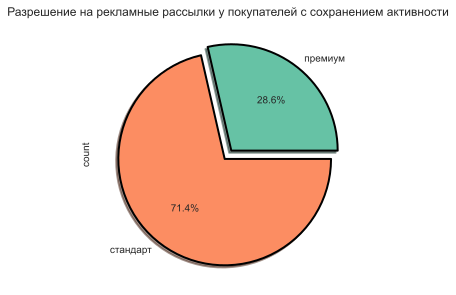

In [121]:
selected_segment[selected_segment["акционные_покупки"] > 0.8][
    "тип_сервиса"
].value_counts(ascending=True).plot(
    kind="pie",
    grid=True,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2"),
    explode=[0.05, 0.05],
    shadow=True,
    wedgeprops={"edgecolor": "black", "linewidth": 2, "antialiased": True},
)
plt.title(
    "Разрешение на рекламные рассылки у покупателей с вероятностью снижения активности"
)
plt.show()
selected_segment_good[selected_segment_good["акционные_покупки"] > 0.8][
    "тип_сервиса"
].value_counts(ascending=True).plot(
    kind="pie",
    grid=True,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2"),
    explode=[0.05, 0.05],
    shadow=True,
    wedgeprops={"edgecolor": "black", "linewidth": 2, "antialiased": True},
)
plt.title("Разрешение на рекламные рассылки у покупателей с сохранением активности")
plt.show()

Вывод по сегментации:
- 
Объединили датафреймы, добавили прогнозы и данные о прибыльност
- Выбрали сегмент для анализ
- П покупатели с высокой прибыльностью (>4,67) и высокой вероятностью снижения покупательской активности (>0,65) и те, у кого активность осталась на прежнем уровне (>0,65
- Изучили распределение прибыльности в сегменте, проверили отношение внутри сегментов к рассылкам, узнали популярные категории покупок, посмотрели типы сервиса и как распределены пользователи с долей акционных покупок более 80%.

**Предложения для выбранного сегмента:**

Большинство покупателей сегмента со снижением активности имеют высокую вероятность (около 0,85) снижения покупательской активности. У большинства прибыльность до 0,6, но есть и очень прибыльные клиенты (выше 6,5). Максимальный показатель прибыльности — 7,43 для всех покупателей заказчика.

В сегменте с высокой прибыльностью и снижением активности — 96 покупателей, со стабильной активностью — 227. Оба сегмента лояльно относятся к рассылкам: 70% положительных значений.

У прибыльных покупателей со снижением активности по акциям чаще всего покупают товары для детей. У прибыльных со стабильной активностью — технику для красоты и здоровья. Только 16% прибыльных клиентов со снижением активности имеют премиум-подписку, а среди прибыльных со стабильной активностью таких 28%.

**Советы по удержанию клиентов:**

1. Увеличить количество акционных предложений. 24 покупателя из 96 совершают более 80% покупок по акциям. Можно повысить их интерес к товарам, отправив специальные предложения, так как 70% сегмента покупателей согласились на рассылку.
2. Предложить пользователям промокоды на скидки на товары из предпочитаемых ими категорий, основываясь на данных за прошлые месяцы:

- мелкая бытова  техника и электроника;
- 
косметика и аксессуаы ;- 
техника для красоты и здорь- я- ;
домашний теи
- л- ь;
кухоннасо
- у- да;
товарыдетей для 

4. Улучшение сайта. Наличие акционных предложений на сайте ощутимо влияет на покупательскую активность. Скидки радуют покупателя и стимулируют его к спонтанной покупке. Чтобы клиент провёл больше времени на сайте, нужно сделать ресурс удобным и приятным для пользователя, а также предложить ему интересные товары. Это увеличит вероятность покупки и принесёт бизнесу прибыль.
5. Выгодные предложения на подписку. 
Пользователи с высокой активностью чаще оформляют премиум-подписку. Возможно, стоит предложить выгодные условия на подписку тем, кто проявляет низкую активность.детей.

**Советы по удержанию клиентов:**

1. Увеличить количество акционных предложений. 24 покупателя из 96 совершают более 80% покупок по акциям. Можно повысить их интерес к товарам, отправив специальные предложения, так как 70% сегмента покупателей согласились на рассылку.

2. Предложить пользователям промокоды на скидки на товары из предпочитаемых ими категорий, основываясь на данных за прошлые месяцы:
- мелкая бытова  техника и электроника;
- косметика и аксессуары;
- техника для красоты и здоровья;
- домашний текстиль;
- кухонная посуда;
- товары для детей

4. Улучшение сайта. Наличие акционных предложений на сайте ощутимо влияет на покупательскую активность. Скидки радуют покупателя и стимулируют его к спонтанной покупке. Чтобы клиент провёл больше времени на сайте, нужно сделать ресурс удобным и приятным для пользователя, а также предложить ему интересные товары. Это увеличит вероятность покупки и принесёт бизнесу прибыль.
5. Выгодные предложения на подписку. 
Пользователи с высокой активностью чаще оформляют премиум-подписку. Возможно, стоит предложить выгодные условия на подписку тем, кто проявляет низкую активность.детей.

## Общий вывод

**1) опишите задачу**
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе.

**2) опишите исходные данные и проведённую предобработку**

Описание данных:
1. `market_file.csv` - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    - `id` — номер покупателя в корпоративной базе данных.
    - **`Покупательская активность`** — рассчитанный класс покупательской активности **(целевой признак)**: «снизилась» или «прежний уровень».
    - `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
    - `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    - `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    - `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
    - `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    - `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    - `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
    - `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    - `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
    - `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
    - `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.  
      
      
2. `market_money.csv` - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    - `Выручка` — сумма выручки за период.
  
    
3. `market_time.csv` - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Период` — название периода, во время которого зафиксировано общее время.
    - `минут` — значение времени, проведённого на сайте, в минутах.
  
    
4. `money.csv` - Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
    - `id` — номер покупателя в корпоративной базе данных.
    - `Прибыль` — значение прибыли.
    
Предобработка:  
- Проверили данные на дубликаты - обнаружили скрытые дубликаты, поправили данные  
- Привели типы - числовые столбцы  к float32 - для возможности осуществления математических операций, просто числовые столбцы к int32 для экономии памяти, а так же остальные данные к категориальному типу, что съэкономило память
- Осуществили объедините таблиц market_file.csv, market_money.csv, market_time.csv. При этом создали дополнительные столбцы содержащие данные для каждого периода по выручке. Удалили пользователей с непостоянной активностью, а так же с выбросом.


**3) напишите, что вы сделали для поиска лучшей модели;**  
***провели корреляционный анализ***

    - Целевой признак: покупательская_активность.   
    - Остальные - входные.  
Как наш целевой признак взаимодейтсвует с остальными:  

    - тип_сервиса - 0.13 - Слабая, практически отсутствует. 
    - разрешить_сообщать - 0.00 - Отсутствует 
    - маркет_актив_6 мес - 0.54 - Заметная 
    - маркет_актив_тек_мес - 0.00 - Отсутствует 
    - длительность 0.10 - Слабая, практически отсутствует 
    - акционные_покупки - 0.51 - Заметная 
    - популярная_категория - 0.30 - Умеренная 
    - средний_просмотр_категорий_за_визит - 0.54 - Заметная 
    - неоплаченные_продукты_штук_квартал - 0.51 - Заметная 
    - ошибка_сервиса - 0.22 - Слабая 
    - страниц_за_визит - 0.75 - Высокая (самая высокая взаимосвязь)
    - выручка_текущий_месяц - 0.20 - Слабая 
    - выручка_предыдущий_месяц - 0.22 - Слабая 
    - выручка_предпредыдущий_месяц - 0.50 - Заметная 
    - минут_текущий_месяц - 0.58 - Заметная 
    - минут_предыдущий_месяц - 0.69 Заметная (занимает второе место)  

При мультиколлинеральноси имеются взаимосвязи т 0.9 до 0.95 по модулю.
Таких значений у нас нет, следовательно можно сделать вывод об отсутствии мультиколлинеарности.

***проверили данные на дисбалланс, обнаружили явный дисбалланс***

    - мажорный класс — активность осталось на прежнем уровне 62%
    - минорный класс — активность снизилась 38%  
    для решения данной проблемы используем стратификацию 
    
***создали пайплайн для поиска лучшей модели и гиперпараметров.***   
**Используем модели:**
- `DecisionTreeClassifier()` (дерево решений) с гиперпараметрами 
    - `max_depth` от 2 до 5 включительно ((глубина) каждого дерева в модели) и 
    - `max_features` от 2 до 5 включительно. (max_features — максимальное количество признаков, которые могут быть перебраны при разбиении вершины дерева)
- `KNeighborsClassifier()` (ближайшие соседи) с гиперпараметром 
    - n_neighbors от 2 до 5 включительно (количество ближайших соседей, используемых для предсказания).
- `LogisticRegression(solver='liblinear', penalty='l1')` (логистическая регрессия) с гиперпараметром регуляризации 
    - С от 1 до 4 включительно.

* solver — строка (по умолчанию liblinear), которая решает, какой решатель использовать для подбора модели.  
penalty — строка (по умолчанию ‘l2‘), которая определяет, есть ли регуляризация и какой подход использовать. Другие варианты: l1  
* L1-регуляризация помогает отобрать признаки для модели. Она позволяет обнулить коэффициенты части признаков и избавить модель от лишнего балласта.  
* C («сила» модели) — положительное число с плавающей запятой (1.0 по умолчанию), которое определяет относительную силу регуляризации. Меньшие значения указывают на более сильную регуляризацию. 
- `SVC()` (метод опорных векторов) с полиномиальным ядром гиперпараметрами
    - глубина degree от 1 до 5 включительно
    - Параметр регуляризации (C)

**4) укажите лучшую модель;**

**Получили лучшую модель: 
LogisticRegression(C=3, penalty='l1', random_state=42, solver='liblinear')**

***Обучили модель используя параметры и гиперпараметры лучшей модели***

***Провели анализ значимости признаков***  
Наименее значимые признаки:

    - популярная_категория_Косметика и аксессуары
    - разрешить_сообщать
    - популярная_категория_Кухонная посуда
    - маркет_актив_тек_мес
    - тип_сервиса

Признаки, сильнее всего влияюшие на целевой признак:

    - страниц_за_визит
    - средний_просмотр_категорий_за_визит
    - минут_предыдущий_месяц
    - акционные_покупки
    - минут_текущий_месяц

**Совет для бизнеса:**

Наличие акционных предложений существенно влияет на покупательскую активность. Акции радуют клиентов и стимулируют их совершать покупки, которые изначально могли не планироваться.

Кроме того, важно создать условия, чтобы клиенты проводили больше времени на сайте: обеспечить удобство использования, привлекательный интерфейс, предложить интересные товары. Это увеличит вероятность покупки и принесёт бизнесу прибыль.
    
      
**5) добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.**

Вывод по сегментации:
- Объединили датафреймы, добавили прогнозы и данные о прибыльност
- Выбрали сегмент для анализ
- П покупатели с высокой прибыльностью (>4,67) и высокой вероятностью снижения покупательской активности (>0,65) и те, у кого активность осталась на прежнем уровне (>0,65
- Изучили распределение прибыльности в сегменте, проверили отношение внутри сегментов к рассылкам, узнали популярные категории покупок, посмотрели типы сервиса и как распределены пользователи с долей акционных покупок более 80%.


**Предложения для выбранного сегмента:**

Большинство покупателей сегмента со снижением активности имеют высокую вероятность (около 0,85) снижения покупательской активности. У большинства прибыльность до 0,6, но есть и очень прибыльные клиенты (выше 6,5). Максимальный показатель прибыльности — 7,43 для всех покупателей заказчика.

В сегменте с высокой прибыльностью и снижением активности — 96 покупателей, со стабильной активностью — 227. Оба сегмента лояльно относятся к рассылкам: 70% положительных значений.

У прибыльных покупателей со снижением активности по акциям чаще всего покупают товары для детей. У прибыльных со стабильной активностью — технику для красоты и здоровья. Только 16% прибыльных клиентов со снижением активности имеют премиум-подписку, а среди прибыльных со стабильной активностью таких 28%.


**Советы по удержанию клиентов:**

1. Увеличить количество акционных предложений. 24 покупателя из 96 совершают более 80% покупок по акциям. Можно повысить их интерес к товарам, отправив специальные предложения, так как 70% сегмента покупателей согласились на рассылку.

2. Предложить пользователям промокоды на скидки на товары из предпочитаемых ими категорий, основываясь на данных за прошлые месяцы:
- мелкая бытова  техника и электроника;
- косметика и аксессуары;
- техника для красоты и здоровья;
- домашний текстиль;
- кухонная посуда;
- товары для детей

4. Улучшение сайта. Наличие акционных предложений на сайте ощутимо влияет на покупательскую активность. Скидки радуют покупателя и стимулируют его к спонтанной покупке. Чтобы клиент провёл больше времени на сайте, нужно сделать ресурс удобным и приятным для пользователя, а также предложить ему интересные товары. Это увеличит вероятность покупки и принесёт бизнесу прибыль.
5. Выгодные предложения на подписку. 
Пользователи с высокой активностью чаще оформляют премиум-подписку. Возможно, стоит предложить выгодные условия на подписку тем, кто проявляет низкую активность.детей.